<a href="https://colab.research.google.com/github/thisisSHAX/ML_Ops_Project-/blob/main/Autism_Screening_Master.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Load Dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
df = pd.read_csv('https://drive.google.com/uc?export=download&id=16Pd-BdhzNMzPqPWD6XEu_XFZaGrSqFUz')

In [3]:
df.head()

Case_No  A1  A2  ...  Family_mem_with_ASD  Who completed the test  Class/ASD Traits 
0        1   0   0  ...                   no           family member                 No
1        2   1   1  ...                   no           family member                Yes
2        3   1   0  ...                   no           family member                Yes
3        4   1   1  ...                   no           family member                Yes
4        5   1   1  ...                  yes           family member                Yes

[5 rows x 19 columns]

In [4]:
df.describe()

Case_No           A1  ...     Age_Mons  Qchat-10-Score
count  1054.000000  1054.000000  ...  1054.000000     1054.000000
mean    527.500000     0.563567  ...    27.867173        5.212524
std     304.407895     0.496178  ...     7.980354        2.907304
min       1.000000     0.000000  ...    12.000000        0.000000
25%     264.250000     0.000000  ...    23.000000        3.000000
50%     527.500000     1.000000  ...    30.000000        5.000000
75%     790.750000     1.000000  ...    36.000000        8.000000
max    1054.000000     1.000000  ...    36.000000       10.000000

[8 rows x 13 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054 entries, 0 to 1053
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Case_No                 1054 non-null   int64 
 1   A1                      1054 non-null   int64 
 2   A2                      1054 non-null   int64 
 3   A3                      1054 non-null   int64 
 4   A4                      1054 non-null   int64 
 5   A5                      1054 non-null   int64 
 6   A6                      1054 non-null   int64 
 7   A7                      1054 non-null   int64 
 8   A8                      1054 non-null   int64 
 9   A9                      1054 non-null   int64 
 10  A10                     1054 non-null   int64 
 11  Age_Mons                1054 non-null   int64 
 12  Qchat-10-Score          1054 non-null   int64 
 13  Sex                     1054 non-null   object
 14  Ethnicity               1054 non-null   object
 15  Jaun

### Feature Set Selection

In [6]:
df.columns

Index(['Case_No', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',
       'Age_Mons', 'Qchat-10-Score', 'Sex', 'Ethnicity', 'Jaundice',
       'Family_mem_with_ASD', 'Who completed the test', 'Class/ASD Traits '],
      dtype='object')

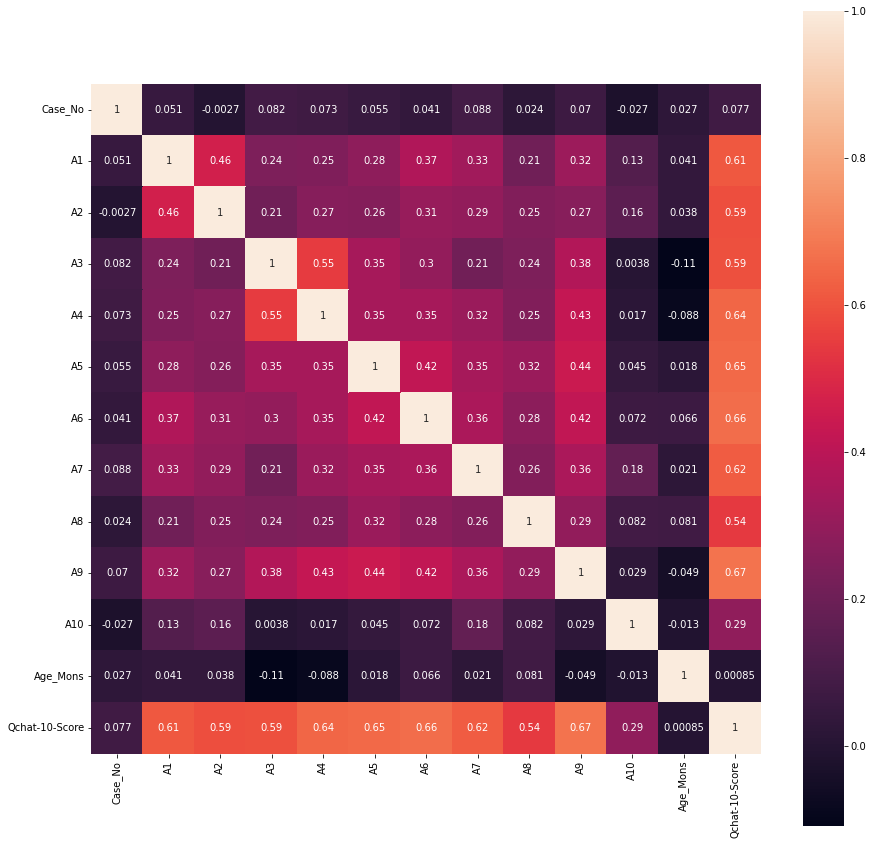

In [7]:
corr = df.corr()
plt.figure(figsize = (15,15))
sns.heatmap(data = corr, annot = True, square = True, cbar = True)

Qchat-10-Score has high correlation with A1 to A9. Hence, we can drop this feature

In [8]:
x_columns = ['A1','A2','A3','A4','A5','A6','A7','A8','A9','A10','Age_Mons','Sex','Ethnicity','Jaundice','Family_mem_with_ASD']

In [9]:
cat_features = ['A1','A2','A3','A4','A5','A6','A7','A8','A9','A10','Sex','Ethnicity','Jaundice','Family_mem_with_ASD']

In [10]:
num_features = list(set(x_columns) - set(cat_features))

In [11]:
num_features

['Age_Mons']

In [12]:
df[x_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054 entries, 0 to 1053
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   A1                   1054 non-null   int64 
 1   A2                   1054 non-null   int64 
 2   A3                   1054 non-null   int64 
 3   A4                   1054 non-null   int64 
 4   A5                   1054 non-null   int64 
 5   A6                   1054 non-null   int64 
 6   A7                   1054 non-null   int64 
 7   A8                   1054 non-null   int64 
 8   A9                   1054 non-null   int64 
 9   A10                  1054 non-null   int64 
 10  Age_Mons             1054 non-null   int64 
 11  Sex                  1054 non-null   object
 12  Ethnicity            1054 non-null   object
 13  Jaundice             1054 non-null   object
 14  Family_mem_with_ASD  1054 non-null   object
dtypes: int64(11), object(4)
memory usage: 123.6+ KB


### Encode Categorical Variables

In [13]:
# One hot encoding
#encoded_df = pd.get_dummies(df[x_columns], columns=cat_features)
encoded_df = pd.get_dummies(df[x_columns], columns=cat_features, drop_first = True)

In [14]:
encoded_df.sample(5)

Age_Mons  A1_1  ...  Jaundice_yes  Family_mem_with_ASD_yes
701        26     0  ...             1                        0
739        30     0  ...             0                        0
317        16     0  ...             1                        1
415        27     0  ...             0                        0
861        26     1  ...             0                        0

[5 rows x 24 columns]

In [15]:
x_features = list(encoded_df.columns)

In [16]:
encoded_df.shape

(1054, 24)

### Data Splitting

In [17]:
X = encoded_df

In [18]:
Y = pd.get_dummies(df['Class/ASD Traits '], drop_first=True)

In [19]:
X

Age_Mons  A1_1  ...  Jaundice_yes  Family_mem_with_ASD_yes
0           28     0  ...             1                        0
1           36     1  ...             1                        0
2           36     1  ...             1                        0
3           24     1  ...             0                        0
4           20     1  ...             0                        1
...        ...   ...  ...           ...                      ...
1049        24     0  ...             0                        1
1050        12     0  ...             1                        0
1051        18     1  ...             1                        0
1052        19     1  ...             0                        1
1053        24     1  ...             1                        1

[1054 rows x 24 columns]

In [20]:
Y

Yes
0       0
1       1
2       1
3       1
4       1
...   ...
1049    0
1050    1
1051    1
1052    0
1053    1

[1054 rows x 1 columns]

In [21]:
#Checking imbalance
Y.sum()/len(Y)

Yes    0.690702
dtype: float64

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
# Splitting
train_X, test_X, train_Y, test_Y = train_test_split(df[x_columns], Y, test_size=0.2, random_state=1)

train_X, prod_X, train_Y, prod_Y = train_test_split(train_X, train_Y, test_size=0.25, random_state=2) # 0.25 x 0.8 = 0.2

In [24]:
# Splitting after One - Hot Encoding
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

X_train, X_prod, Y_train, Y_prod = train_test_split(X_train, Y_train, test_size=0.25, random_state=2) # 0.25 x 0.8 = 0.2

In [25]:
X_train['Age_Mons'].shape

(632,)

In [26]:
X_test.shape

(211, 24)

In [27]:
X_prod.shape

(211, 24)

In [28]:
Y_train.shape

(632, 1)

## Saving in different formats

In [29]:
import os

In [30]:
#Without Encoding
train_X.to_csv("./sample_data/train_x.csv")
test_X.to_csv("./sample_data/test_x.csv")
prod_X.to_csv("./sample_data/prod_x.csv")

In [31]:
#With Encoding
X_train.to_csv("./sample_data/x_train.csv")
X_test.to_csv("./sample_data/x_test.csv")
X_prod.to_csv("./sample_data/x_prod.csv")

In [32]:
#pickle
train_X.to_pickle("./sample_data/train_x.pkl")
test_X.to_pickle("./sample_data/test_x.pkl")
prod_X.to_pickle("./sample_data/prod_x.pkl")

In [33]:
#parquet
train_X.to_parquet("./sample_data/train_x.parquet")
test_X.to_parquet("./sample_data/test_x.parquet")
prod_X.to_parquet("./sample_data/prod_x.parquet")

In [34]:
#pickle with encoding
X_train.to_pickle("./sample_data/x_train.pkl")
X_test.to_pickle("./sample_data/x_test.pkl")
X_prod.to_pickle("./sample_data/x_prod.pkl")

In [35]:
#parquet with encoding
X_train.to_parquet("./sample_data/x_train.parquet")
X_test.to_parquet("./sample_data/x_test.parquet")
X_prod.to_parquet("./sample_data/x_prod.parquet")

In [36]:
ls -al sample_data

total 55912
drwxr-xr-x 1 root root     4096 Nov 25 07:35 ./
drwxr-xr-x 1 root root     4096 Nov 18 14:36 ../
-rwxr-xr-x 1 root root     1697 Jan  1  2000 anscombe.json*
-rw-r--r-- 1 root root   301141 Nov 18 14:36 california_housing_test.csv
-rw-r--r-- 1 root root  1706430 Nov 18 14:36 california_housing_train.csv
-rw-r--r-- 1 root root 18289443 Nov 18 14:36 mnist_test.csv
-rw-r--r-- 1 root root 36523880 Nov 18 14:36 mnist_train_small.csv
-rw-r--r-- 1 root root     9836 Nov 25 07:35 prod_x.csv
-rw-r--r-- 1 root root    12665 Nov 25 07:35 prod_x.parquet
-rw-r--r-- 1 root root    23007 Nov 25 07:35 prod_x.pkl
-rwxr-xr-x 1 root root      930 Jan  1  2000 README.md*
-rw-r--r-- 1 root root     9910 Nov 25 07:35 test_x.csv
-rw-r--r-- 1 root root    12628 Nov 25 07:35 test_x.parquet
-rw-r--r-- 1 root root    22987 Nov 25 07:35 test_x.pkl
-rw-r--r-- 1 root root    29409 Nov 25 07:35 train_x.csv
-rw-r--r-- 1 root root    16157 Nov 25 07:35 train_x.parquet
-rw-r--r-- 1 root root    66807 Nov 25 

In [37]:
filenames = ['./sample_data/train_x.csv',
             './sample_data/train_x.pkl', 
             './sample_data/train_x.parquet',
             './sample_data/x_train.csv',
             './sample_data/x_train.pkl', 
             './sample_data/x_train.parquet'
            ]

all_filesizes = [os.path.getsize(f) for f in filenames]             
 
filescompare_df = pd.DataFrame( { "formats" : filenames,
                                  "filesize": all_filesizes})

In [38]:
filescompare_df

formats  filesize
0      ./sample_data/train_x.csv     29409
1      ./sample_data/train_x.pkl     66807
2  ./sample_data/train_x.parquet     16157
3      ./sample_data/x_train.csv     33775
4      ./sample_data/x_train.pkl     25878
5  ./sample_data/x_train.parquet     21823

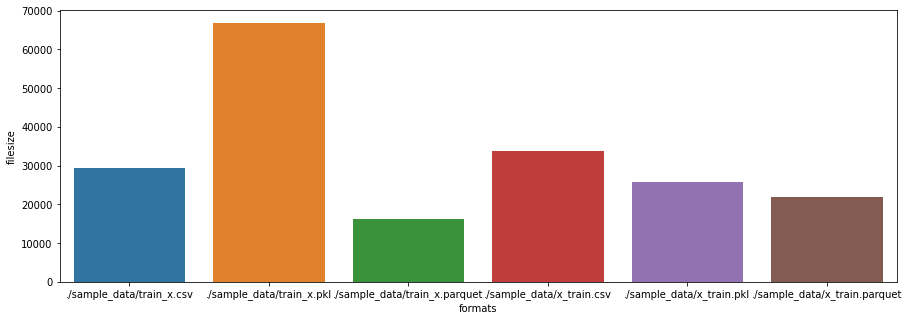

In [39]:
plt.figure( figsize = (15, 5) )
sns.barplot( data = filescompare_df,
           x = 'formats',
           y = 'filesize');

## Read time benchmarking of different formats

In [40]:
%%time 

train_pkl_df = pd.read_pickle("./sample_data/train_x.pkl")

CPU times: user 2.21 ms, sys: 976 µs, total: 3.18 ms
Wall time: 3.18 ms


In [41]:
%%time 

train_parquet_df = pd.read_parquet("./sample_data/train_x.parquet")

CPU times: user 12 ms, sys: 5.37 ms, total: 17.4 ms
Wall time: 41 ms


In [42]:
%%time 

train_csv_df = pd.read_csv("./sample_data/train_x.csv")

CPU times: user 6.92 ms, sys: 572 µs, total: 7.49 ms
Wall time: 11.2 ms


In [43]:
filenames2 = ['./sample_data/train_x.csv',
             './sample_data/train_x.pkl', 
             './sample_data/train_x.parquet'
            ]          
 
filescompare2_df = pd.DataFrame( { "formats" : filenames2})

In [44]:
import time

t1 = time.perf_counter()
train_df = pd.read_csv("./sample_data/train_x.csv")
time_csv = time.perf_counter() - t1

t1 = time.perf_counter()
train_pkl_df = pd.read_pickle("./sample_data/train_x.pkl")
time_pkl = time.perf_counter() - t1

t1 = time.perf_counter()
train_parquet_df = pd.read_parquet("./sample_data/train_x.parquet")
time_parquet = time.perf_counter() - t1

In [45]:
time_csv

0.007171481999989737

In [46]:
filescompare2_df['read_time'] = [time_csv, time_pkl, time_parquet]

In [47]:
filescompare2_df

formats  read_time
0      ./sample_data/train_x.csv   0.007171
1      ./sample_data/train_x.pkl   0.001583
2  ./sample_data/train_x.parquet   0.004967

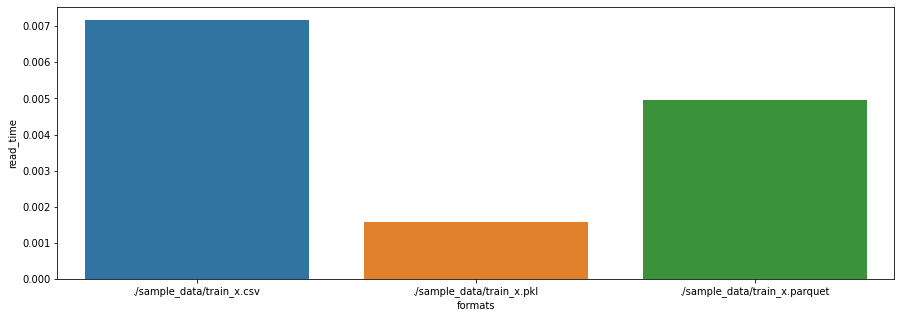

In [48]:
plt.figure( figsize = (15, 5) )
sns.barplot( data = filescompare2_df,
           x = 'formats',
           y = 'read_time');

## Data Profiling

In [ ]:
!pip install -U pandas-profiling==2.8.0

     |████████████████████████████████| 259 kB 6.5 MB/s 
     |████████████████████████████████| 675 kB 6.8 MB/s 
     |████████████████████████████████| 59 kB 8.3 MB/s 
     |████████████████████████████████| 4.7 MB 38.5 MB/s 
     |████████████████████████████████| 812 kB 66.7 MB/s 
     |████████████████████████████████| 38.1 MB 1.3 MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=76c3a84f0737fe2ec4c53e0e4064808738df31b0be453cd39582b4dd8f5da450
  Stored in directory: /root/.cache/pip/wheels/70/e1/52/5b14d250ba868768823940c3229e9950d201a26d0bd3ee8655
  Created wheel for imagehash: filename=ImageHash-4.2.1-py2.py3-none-any.whl size=295207 sha256=7ce75c957c9f55890bff56f0a43fe954ab96a808336517c81b1d1e6f880bb21b
  Stored in directory: /root/.cache/pip/wheels/4c/d5/59/5e3e297533ddb09407769762985d134135064c6831e29a914e
Successfully built htmlmin imagehash
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling

In [ ]:
import numpy as np
import pandas as pd
import pandas_profiling
from pandas_profiling import ProfileReport

In [ ]:
pd.__version__

'1.1.5'

In [ ]:
np.__version__

'1.19.5'

### Loading the dataset

In [ ]:
df = pd.read_csv('https://drive.google.com/uc?export=download&id=16Pd-BdhzNMzPqPWD6XEu_XFZaGrSqFUz')

In [ ]:
df.head(5)

Case_No  A1  A2  ...  Family_mem_with_ASD  Who completed the test  Class/ASD Traits 
0        1   0   0  ...                   no           family member                 No
1        2   1   1  ...                   no           family member                Yes
2        3   1   0  ...                   no           family member                Yes
3        4   1   1  ...                   no           family member                Yes
4        5   1   1  ...                  yes           family member                Yes

[5 rows x 19 columns]

### Creating the data profile

In [ ]:
profile = ProfileReport(df, title = 'Autism Screening Data Profiling Report')

In [ ]:
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/33 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
profile.to_file("autismscreening_report.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('https://drive.google.com/uc?export=download&id=16Pd-BdhzNMzPqPWD6XEu_XFZaGrSqFUz')
df.head()

Case_No  A1  A2  ...  Family_mem_with_ASD  Who completed the test  Class/ASD Traits 
0        1   0   0  ...                   no           family member                 No
1        2   1   1  ...                   no           family member                Yes
2        3   1   0  ...                   no           family member                Yes
3        4   1   1  ...                   no           family member                Yes
4        5   1   1  ...                  yes           family member                Yes

[5 rows x 19 columns]

In [ ]:
x_columns = ['A1','A2','A3','A4','A5','A6','A7','A8','A9','A10','Age_Mons','Sex','Ethnicity','Jaundice','Family_mem_with_ASD']
cat_features = ['A1','A2','A3','A4','A5','A6','A7','A8','A9','A10','Sex','Ethnicity','Jaundice','Family_mem_with_ASD']
num_features = list(set(x_columns) - set(cat_features))

In [ ]:
encoded_df = pd.get_dummies(df[x_columns], columns=cat_features, drop_first = True)
encoded_df.sample(5)

Age_Mons  A1_1  ...  Jaundice_yes  Family_mem_with_ASD_yes
820        18     0  ...             0                        1
62         36     1  ...             1                        0
82         36     1  ...             1                        0
835        31     0  ...             1                        0
676        32     1  ...             0                        0

[5 rows x 24 columns]

In [ ]:
x_features = list(encoded_df.columns)

In [ ]:
X = encoded_df
Y = pd.get_dummies(df['Class/ASD Traits '], drop_first=True)
#Checking imbalance
Y.sum()/len(Y)

Yes    0.690702
dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
# Splitting
train_X, test_X, train_Y, test_Y = train_test_split(df[x_columns], Y, test_size=0.2, random_state=1)
train_X, prod_X, train_Y, prod_Y = train_test_split(train_X, train_Y, test_size=0.25, random_state=2) # 0.25 x 0.8 = 0.2

# Splitting after One - Hot Encoding
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
X_train, X_prod, Y_train, Y_prod = train_test_split(X_train, Y_train, test_size=0.25, random_state=2) # 0.25 x 0.8 = 0.2

## Modelling

In [ ]:
!pip install wandb

     |████████████████████████████████| 1.7 MB 33.3 MB/s 
     |████████████████████████████████| 180 kB 55.3 MB/s 
     |████████████████████████████████| 97 kB 7.6 MB/s 
     |████████████████████████████████| 140 kB 60.0 MB/s 
     |████████████████████████████████| 63 kB 2.1 MB/s 
  Created wheel for subprocess32: filename=subprocess32-3.5.4-py3-none-any.whl size=6502 sha256=c2a7534a13776fca50fa8a50fec266705adbc57af759584b343cc8c9e9dbf585
  Stored in directory: /root/.cache/pip/wheels/50/ca/fa/8fca8d246e64f19488d07567547ddec8eb084e8c0d7a59226a
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8807 sha256=ad6125833f3d4b3ce43363e4fea7f8f803815c4da523046bd3e91ff16a0f826f
  Stored in directory: /root/.cache/pip/wheels/3e/31/09/fa59cef12cdcfecc627b3d24273699f390e71828921b2cbba2
Successfully built subprocess32 pathtools


In [ ]:
import wandb
wandb.login()

<IPython.core.display.Javascript object>

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [ ]:
import os

In [ ]:
os.environ["WANDB_API_KEY"] = "26ff855733a63e9d999357d3e3bd1eb135cff5a5"

In [ ]:
def run_model_experiment(model,
                         x_train,
                         y_train,
                         x_test,
                         y_test,
                         name,
                         config = None,
                         tags = None):
  
  model.fit(x_train, y_train)
  y_pred = model.predict(x_test)
  y_probas = model.predict_proba(x_test)
  features = x_train.columns

  wandb.init(project='AutismScreening', config=config, tags = tags)
  wandb.run.name = name

  acc = metrics.accuracy_score(y_test, model.predict(x_test))
  prec = metrics.precision_score(y_test, model.predict(x_test))
  rec = metrics.recall_score(y_test, model.predict(x_test))
  f1 = metrics.f1_score(y_test, model.predict(x_test))
  
  #rmse = np.sqrt(mean_squared_error(y_test, model.predict(x_test)))
  #r2 = model.score(x_test, y_test)

  wandb.log( {"Accuracy" : acc, 
              "Precision": prec,
              "Recall": rec,
              "F1 score" : f1} )
  
  wandb.sklearn.plot_classifier(model, x_train, x_test, y_train, y_test, 
                                y_pred, y_probas, features, model_name=name)
 
  #wandb.sklearn.plot_regressor(model, 
  #                             x_train, 
  #                             x_test, 
  #                             y_train, 
  #                             y_test,  
  #                             model_name=name)
  
  wandb.Artifact(name, 
                 type = 'model',
                 description = config)

  wandb.save()
  wandb.finish()

  return model

### Logistic Regression

In [ ]:
#wandb.init(project="ML_Ops_Project", entity="thisisshax")

In [ ]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(max_iter= 10000)

# fit the model with data
logreg.fit(X_train,Y_train)

#
Y_pred=logreg.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Text(0.5, 257.44, 'Predicted label')

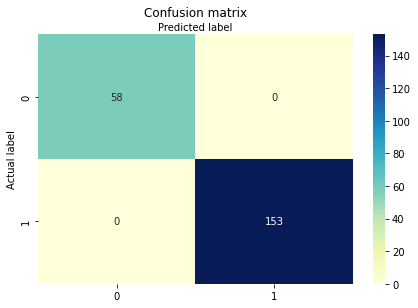

In [ ]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(Y_test, Y_pred)

# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))
print("Precision:",metrics.precision_score(Y_test, Y_pred))
print("Recall:",metrics.recall_score(Y_test, Y_pred))
print("f1 score:",metrics.f1_score(Y_test, Y_pred))
print("Specificity", cnf_matrix.ravel()[0]/(cnf_matrix.ravel()[0]+cnf_matrix.ravel()[1]))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
f1 score: 1.0
Specificity 1.0


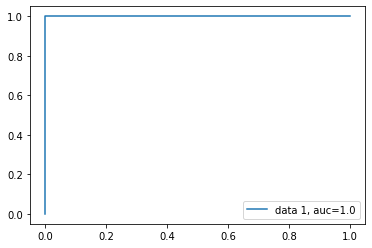

In [ ]:
Y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  Y_pred_proba)
auc = metrics.roc_auc_score(Y_test, Y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [ ]:
lr_model = run_model_experiment(logreg,
                                   X_train,
                                   Y_train,
                                   X_test,
                                   Y_test,
                                   name = 'LogisticRegressionModel',
                                   tags = ['LogisticRegression'])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
wandb: Currently logged in as: thisisshax (use `wandb login --relogin` to force relogin)


wandb: 
wandb: Plotting LogisticRegressionModel.
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"
wandb: Logged feature importances.
wandb: Logged confusion matrix.
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"
wandb: Logged summary metrics.
wandb: Logged class proportions.
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

### KNN

In [ ]:
#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=10)

#Train the model using the training sets
knn.fit(X_train, Y_train)

#Predict the response for production dataset
Y_pred = knn.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Text(0.5, 257.44, 'Predicted label')

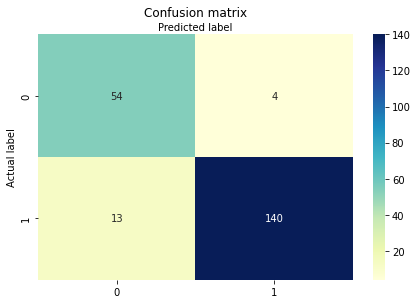

In [ ]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(Y_test, Y_pred)
cnf_matrix

# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))
print("Precision:",metrics.precision_score(Y_test, Y_pred))
print("Recall:",metrics.recall_score(Y_test, Y_pred))
print("f1 score:",metrics.f1_score(Y_test, Y_pred))
print("Specificity", cnf_matrix.ravel()[0]/(cnf_matrix.ravel()[0]+cnf_matrix.ravel()[1]))

Accuracy: 0.919431279620853
Precision: 0.9722222222222222
Recall: 0.9150326797385621
f1 score: 0.9427609427609427
Specificity 0.9310344827586207


In [ ]:
knn_model = run_model_experiment(knn,
                                   X_train,
                                   Y_train,
                                   X_test,
                                   Y_test,
                                   name = 'KNNModel',
                                   tags = ['KNN'])

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


wandb: 
wandb: Plotting KNNModel.
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
wandb: WARNING could not find any of attributes feature_importances_, feature_log_prob_, coef_ on classifier. Cannot plot feature importances.
wandb: Logged feature importances.
wandb: Logged confusion matrix.
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
wandb: Logged summary metrics.
wandb: Logged class proportions.
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validatio

### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
#Create Decision Tree
dt = DecisionTreeClassifier()

#Train the model using the training sets
dt.fit(X_train, Y_train)

#Predict the response for production dataset
Y_pred = dt.predict(X_test)

Text(0.5, 257.44, 'Predicted label')

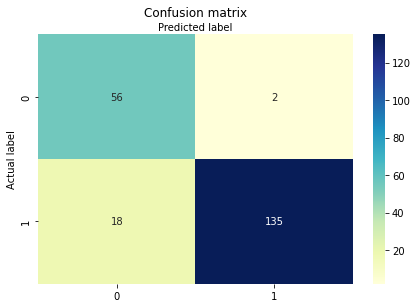

In [ ]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(Y_test, Y_pred)
cnf_matrix

# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))
print("Precision:",metrics.precision_score(Y_test, Y_pred))
print("Recall:",metrics.recall_score(Y_test, Y_pred))
print("f1 score:",metrics.f1_score(Y_test, Y_pred))
print("Specificity", cnf_matrix.ravel()[0]/(cnf_matrix.ravel()[0]+cnf_matrix.ravel()[1]))

Accuracy: 0.9052132701421801
Precision: 0.9854014598540146
Recall: 0.8823529411764706
f1 score: 0.9310344827586207
Specificity 0.9655172413793104


In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 10]

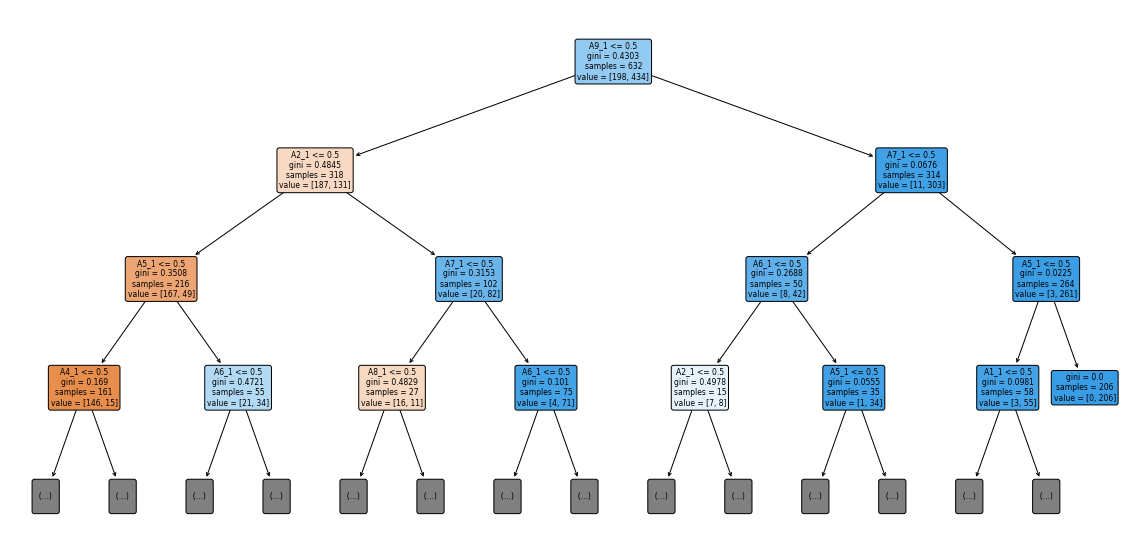

In [ ]:
from sklearn.tree import plot_tree
dec_tree = plot_tree(decision_tree=dt, feature_names = X.columns, filled = True , max_depth = 3, precision = 4, rounded = True)

In [ ]:
dt_model = run_model_experiment(dt,
                                   X_train,
                                   Y_train,
                                   X_test,
                                   Y_test,
                                   name = 'DecisionTree',
                                   tags = ['DecisionTree'])

wandb: 
wandb: Plotting DecisionTree.
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
wandb: Logged feature importances.
wandb: Logged confusion matrix.
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
wandb: Logged summary metrics.
wandb: Logged class proportions.
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sample

In [ ]:
api = wandb.Api()

all_runs = api.runs("thisisshax/AutismScreening", order="+summary_metrics.Accuracy")

for run in all_runs:
  print(f"Model Name: {run.name} and Accuracy {run.summary.get('Accuracy')}")
  print(run.config)

Model Name: DecisionTree and Accuracy 0.8909952606635071
{}
Model Name: KNNModel and Accuracy 0.919431279620853
{}
Model Name: LogisticRegressionModel and Accuracy 1
{}


### Pipeline

In [ ]:
!pip install --upgrade category_encoders

     |████████████████████████████████| 82 kB 395 kB/s 


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from category_encoders import TargetEncoder

In [ ]:
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
categorical_transformer1 = OneHotEncoder(drop='first', sparse=False)
categorical_transformer2 = TargetEncoder()

In [ ]:
preprocessor1 = ColumnTransformer(transformers=[('num', numeric_transformer, num_features),('cat', categorical_transformer1, cat_features)])
preprocessor2 = ColumnTransformer(transformers=[('num', numeric_transformer, num_features),('cat', categorical_transformer2, cat_features)])

In [ ]:
train_X, test_X, train_Y, test_Y = train_test_split(df[x_columns], Y, test_size=0.2, random_state=1)

train_X, prod_X, train_Y, prod_Y = train_test_split(train_X, train_Y, test_size=0.25, random_state=2) # 0.25 x 0.8 = 0.2

In [ ]:
clf1 = Pipeline(steps=[("preprocessor", preprocessor1),("classifier", LogisticRegression(random_state=100))])
clf1.fit(train_X, train_Y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Age_Mons']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['A1', 'A2', 'A3', 'A4', 'A5',
                                                   'A6', 'A7', 'A8', 'A9',
                                                   'A10', 'Sex', 'Ethnicity',
                                                   'Jaundice',
                                                   'Family_mem_with_ASD'])])),
                ('classifier', LogisticRegression(random_state=100))])

In [ ]:
clf2 = Pipeline(steps=[("preprocessor", preprocessor2),("classifier", LogisticRegression(random_state=100))])
clf2.fit(train_X, train_Y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Age_Mons']),
                                                 ('cat', TargetEncoder(),
                                                  ['A1', 'A2', 'A3', 'A4', 'A5',
                                                   'A6', 'A7', 'A8', 'A9',
                                                   'A10', 'Sex', 'Ethnicity',
                                                   'Jaundice',
                                                   'Family_mem_with_ASD'])])),
                ('classifier', LogisticRegression(random_state=100))])

In [ ]:
pred1_Y = clf1.predict(test_X)

Text(0.5, 637.6, 'Predicted label')

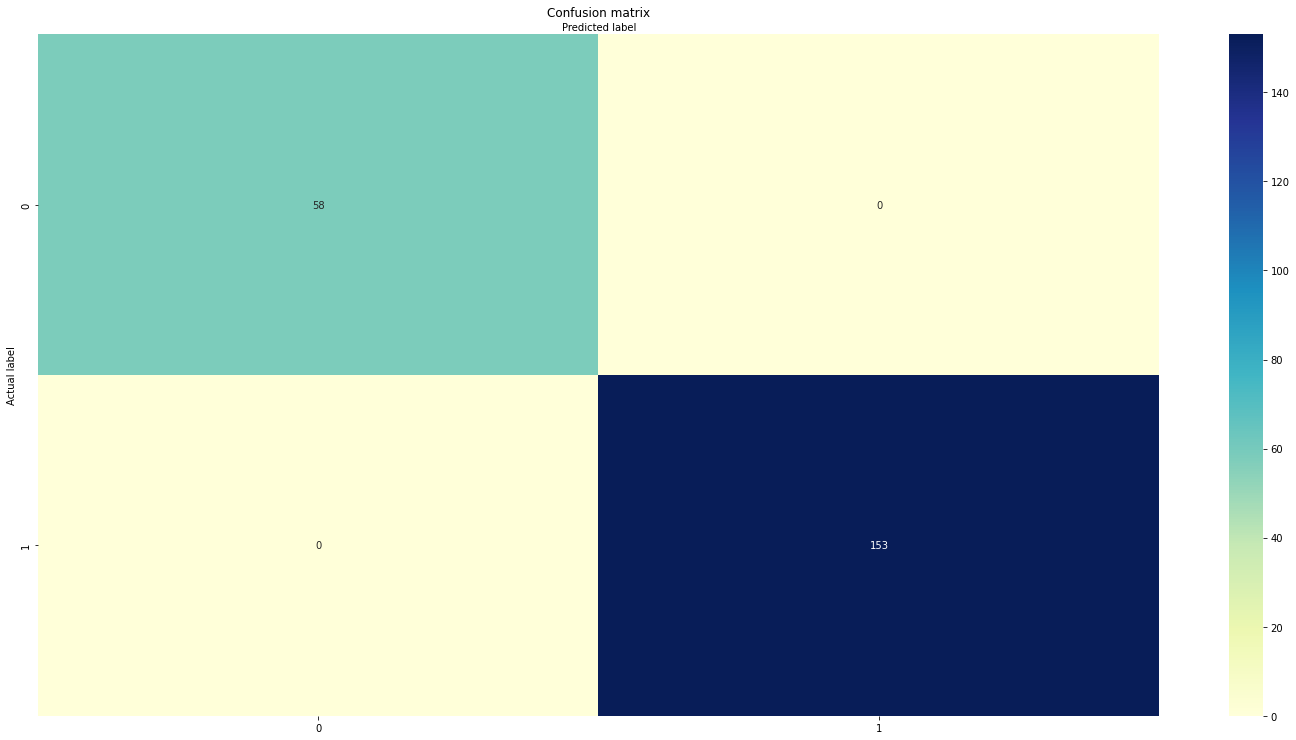

In [ ]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(test_Y, pred1_Y)
cnf_matrix

# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
print("Accuracy:",metrics.accuracy_score(test_Y, pred1_Y))
print("Precision:",metrics.precision_score(test_Y, pred1_Y))
print("Recall:",metrics.recall_score(test_Y, pred1_Y))
print("f1 score:",metrics.f1_score(test_Y, pred1_Y))
print("Specificity", cnf_matrix.ravel()[0]/(cnf_matrix.ravel()[0]+cnf_matrix.ravel()[1]))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
f1 score: 1.0
Specificity 1.0


In [ ]:
pred2_Y = clf2.predict(test_X)

Text(0.5, 637.6, 'Predicted label')

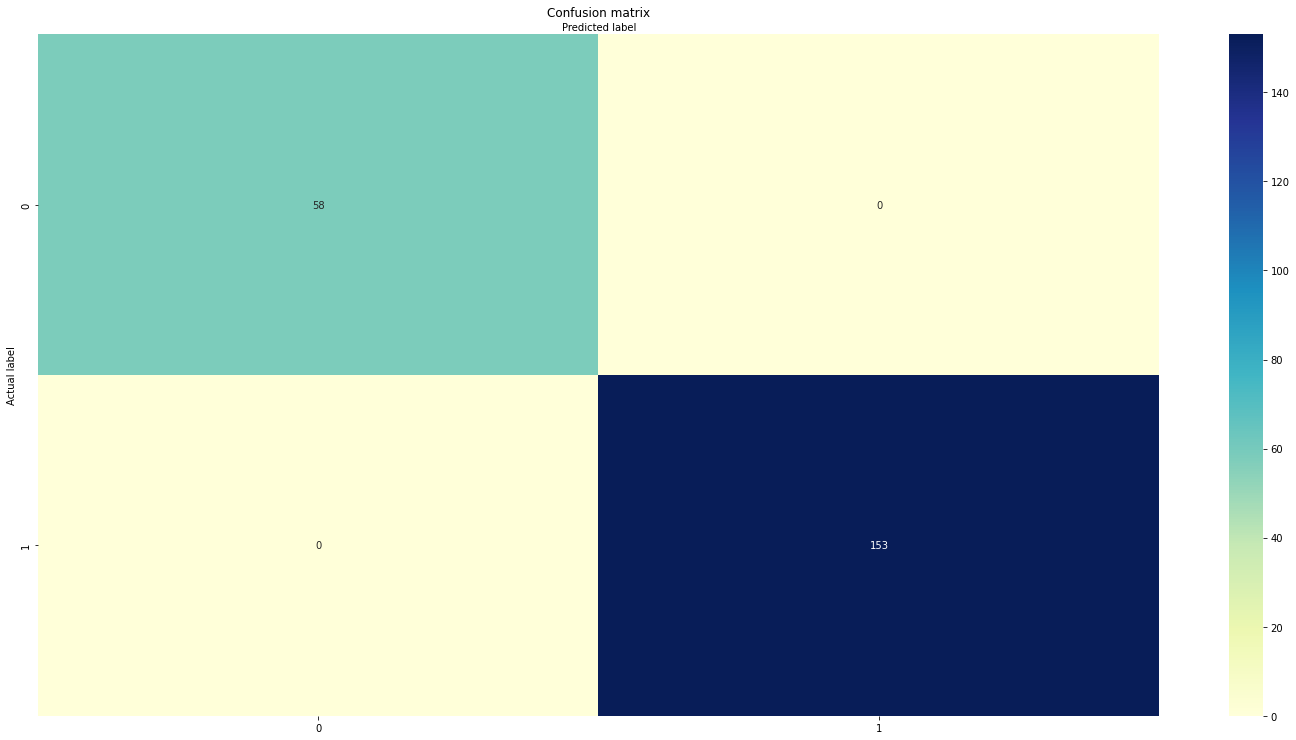

In [ ]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(test_Y, pred2_Y)
cnf_matrix

# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
print("Accuracy:",metrics.accuracy_score(test_Y, pred2_Y))
print("Precision:",metrics.precision_score(test_Y, pred2_Y))
print("Recall:",metrics.recall_score(test_Y, pred2_Y))
print("f1 score:",metrics.f1_score(test_Y, pred2_Y))
print("Specificity", cnf_matrix.ravel()[0]/(cnf_matrix.ravel()[0]+cnf_matrix.ravel()[1]))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
f1 score: 1.0
Specificity 1.0


In [ ]:
!zip -r wandb_models.zip /content/wandb

  adding: content/wandb/ (stored 0%)
  adding: content/wandb/debug-internal.log (deflated 89%)
  adding: content/wandb/run-20211125_082704-zm0z4o9l/ (stored 0%)
  adding: content/wandb/run-20211125_082704-zm0z4o9l/logs/ (stored 0%)
  adding: content/wandb/run-20211125_082704-zm0z4o9l/logs/debug-internal.log (deflated 89%)
  adding: content/wandb/run-20211125_082704-zm0z4o9l/logs/debug.log (deflated 81%)
  adding: content/wandb/run-20211125_082704-zm0z4o9l/run-zm0z4o9l.wandb (deflated 73%)
  adding: content/wandb/run-20211125_082704-zm0z4o9l/files/ (stored 0%)
  adding: content/wandb/run-20211125_082704-zm0z4o9l/files/config.yaml (deflated 71%)
  adding: content/wandb/run-20211125_082704-zm0z4o9l/files/wandb-metadata.json (deflated 39%)
  adding: content/wandb/run-20211125_082704-zm0z4o9l/files/output.log (deflated 81%)
  adding: content/wandb/run-20211125_082704-zm0z4o9l/files/wandb-summary.json (deflated 69%)
  adding: content/wandb/run-20211125_082704-zm0z4o9l/files/requirements.txt 

## AutoML

### Load Dataset

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('https://drive.google.com/uc?export=download&id=16Pd-BdhzNMzPqPWD6XEu_XFZaGrSqFUz')

### Feature Set Selection

In [ ]:
df.columns

Index(['Case_No', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',
       'Age_Mons', 'Qchat-10-Score', 'Sex', 'Ethnicity', 'Jaundice',
       'Family_mem_with_ASD', 'Who completed the test', 'Class/ASD Traits '],
      dtype='object')

In [ ]:
x_columns = ['A1','A2','A3','A4','A5','A6','A7','A8','A9','A10','Age_Mons','Sex','Ethnicity','Jaundice','Family_mem_with_ASD']

In [ ]:
cat_features = ['A1','A2','A3','A4','A5','A6','A7','A8','A9','A10','Sex','Ethnicity','Jaundice','Family_mem_with_ASD']

In [ ]:
num_features = list(set(x_columns) - set(cat_features))

### Encode Categorical Variables

In [ ]:
encoded_df = pd.get_dummies(df[x_columns], columns=cat_features, drop_first = True)

In [ ]:
x_features = list(encoded_df.columns)

In [ ]:
x = encoded_df

In [ ]:
x['Class/ASD Traits '] = df['Class/ASD Traits ']

### Data Splitting

In [ ]:
X = encoded_df

In [ ]:
Y = pd.get_dummies(df['Class/ASD Traits '], drop_first=True)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

X_train, X_prod, Y_train, Y_prod = train_test_split(X_train, Y_train, test_size=0.25, random_state=2) # 0.25 x 0.8 = 0.2

In [ ]:
X_prod.shape

(211, 25)

### Finding the best model

In [ ]:
# Installing H2O dependencies
!pip install requests
!pip install tabulate
!pip install "colorama>=0.3.8"
!pip install future

In [ ]:
# Installing H2O
!pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o

Looking in links: http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html
     |████████████████████████████████| 175.8 MB 32 kB/s 
  Created wheel for h2o: filename=h2o-3.34.0.3-py2.py3-none-any.whl size=175832480 sha256=7304549f727d4ecc9c5f9de964aba290144e4db9ed83192e963f456ee77eab49
  Stored in directory: /root/.cache/pip/wheels/2a/52/cf/01f6938288f0731963463ff72510db67f9f3076f801038b2f7
Successfully built h2o


In [ ]:
import h2o
from h2o.automl import H2OAutoML

In [ ]:
## prepare data
h2o.init()

h2o_train = h2o.H2OFrame(X_train)
h2o_test = h2o.H2OFrame(X_test)

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.11" 2021-04-20; OpenJDK Runtime Environment (build 11.0.11+9-Ubuntu-0ubuntu2.18.04); OpenJDK 64-Bit Server VM (build 11.0.11+9-Ubuntu-0ubuntu2.18.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.7/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp1hw6phzr
  JVM stdout: /tmp/tmp1hw6phzr/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp1hw6phzr/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


--------------------------  ------------------------------------------------------------------
H2O_cluster_uptime:         03 secs
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.34.0.3
H2O_cluster_version_age:    1 month and 17 days
H2O_cluster_name:           H2O_from_python_unknownUser_xyqbn3
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    3.172 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://127.0.0.1:54321
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
H2O_API_Extensions:         Amazon S3, XGBoost, Algos, AutoML, Core V3, TargetEncoder, Core V4
Python_version:             3.7.12 final
--------------------------  ------------------------------------------------------------------

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
aml = H2OAutoML(max_models=10,
                seed=1,
                stopping_metric='MSE',
                sort_metric='MSE',
                max_runtime_secs = 300,
                exclude_algos = ["GLM", "DeepLearning"])

aml.train(x=x_features, 
          y='Class/ASD Traits ', 
          training_frame=h2o_train) 

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_AllModels_4_AutoML_1_20211125_100119

No model summary for this model

ModelMetricsBinomial: stackedensemble
** Reported on train data. **

MSE: 7.225134441777832e-05
RMSE: 0.008500079083030835
LogLoss: 0.004067977688077502
Mean Per-Class Error: 0.0
AUC: 1.0
AUCPR: 1.0
Gini: 1.0

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.9530239260241602: 


No    Yes Error          Rate
0     No  198.0    0.0   0.0   (0.0/198.0)
1    Yes    0.0  434.0   0.0   (0.0/434.0)
2  Total  198.0  434.0   0.0   (0.0/632.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold       value    idx
0                        max f1   0.953024    1.000000   38.0
1                        max f2   0.953024    1.000000   38.0
2                  max f0point5   0.953024    1.000000   38.0
3                  max accuracy   0.953024    1.000000   38.0
4                 max precision   0.998256    1.000000    0.0
5                    max recall   0.953024    1.000000   38.0
6               max specificity   0.998256    1.000000    0.0
7              max absolute_mcc   0.953024    1.000000   38.0
8    max min_per_class_accuracy   0.953024    1.000000   38.0
9   max mean_per_class_accuracy   0.953024    1.000000   38.0
10                      max tns   0.998256  198.000000    0.0
11                      max fns   0.998256  433.000000    0.0
12                      max fps   0.004250  198.000000  120.0
13                      max tps   0.953024  434.000000   38.0
14                      max tnr   0.998256    1.000000    0.0
15                      max fnr   0.998256    0.997696    0.0
16                      max fpr   0.004250    1.000000  120.0
17                      max tpr   0.953024    1.000000   38.0


Gains/Lift Table: Avg response rate: 68.67 %, avg score: 68.73 %


group  cumulative_data_fraction  ...  cumulative_gain  kolmogorov_smirnov
0      1                  0.018987  ...        45.622120            0.027650
1      2                  0.020570  ...        45.622120            0.029954
2      3                  0.030063  ...        45.622120            0.043779
3      4                  0.631329  ...        45.622120            0.919355
4      5                  0.699367  ...        42.986425            0.959596
5      6                  0.830696  ...        20.380952            0.540404
6      7                  0.905063  ...        10.489510            0.303030
7      8                  1.000000  ...         0.000000            0.000000

[8 rows x 14 columns]



ModelMetricsBinomial: stackedensemble
** Reported on cross-validation data. **

MSE: 0.011230029336156098
RMSE: 0.10597183274887766
LogLoss: 0.046157601805581594
Mean Per-Class Error: 0.00691244239631339
AUC: 0.9976376669925057
AUCPR: 0.9990452157739768
Gini: 0.9952753339850113

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.6607768910857049: 


No    Yes   Error          Rate
0     No  198.0    0.0     0.0   (0.0/198.0)
1    Yes    6.0  428.0  0.0138   (6.0/434.0)
2  Total  204.0  428.0  0.0095   (6.0/632.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold       value    idx
0                        max f1   0.660777    0.993039   78.0
1                        max f2   0.233229    0.989416   87.0
2                  max f0point5   0.660777    0.997204   78.0
3                  max accuracy   0.660777    0.990506   78.0
4                 max precision   0.998359    1.000000    0.0
5                    max recall   0.004451    1.000000  169.0
6               max specificity   0.998359    1.000000    0.0
7              max absolute_mcc   0.660777    0.978351   78.0
8    max min_per_class_accuracy   0.660777    0.986175   78.0
9   max mean_per_class_accuracy   0.660777    0.993088   78.0
10                      max tns   0.998359  198.000000    0.0
11                      max fns   0.998359  433.000000    0.0
12                      max fps   0.004120  198.000000  216.0
13                      max tps   0.004451  434.000000  169.0
14                      max tnr   0.998359    1.000000    0.0
15                      max fnr   0.998359    0.997696    0.0
16                      max fpr   0.004120    1.000000  216.0
17                      max tpr   0.004451    1.000000  169.0


Gains/Lift Table: Avg response rate: 68.67 %, avg score: 68.56 %


group  cumulative_data_fraction  ...  cumulative_gain  kolmogorov_smirnov
0       1                  0.011076  ...        45.622120            0.016129
1       2                  0.020570  ...        45.622120            0.029954
2       3                  0.113924  ...        45.622120            0.165899
3       4                  0.245253  ...        45.622120            0.357143
4       5                  0.375000  ...        45.622120            0.546083
5       6                  0.512658  ...        45.622120            0.746544
6       7                  0.618671  ...        45.622120            0.900922
7       8                  0.699367  ...        41.668578            0.930177
8       9                  0.799051  ...        24.860154            0.634059
9      10                  0.912975  ...         9.532062            0.277778
10     11                  1.000000  ...         0.000000            0.000000

[11 rows x 14 columns]

### Leaderboard

In [ ]:
# Get leaderboard with `extra_columns` = 'ALL'
lb = h2o.automl.get_leaderboard(aml, extra_columns = 'ALL')
lb

model_id mse auc logloss aucpr mean_per_class_error rmse training_time_ms predict_time_per_row_ms algo 
 
 
 StackedEnsemble_AllModels_4_AutoML_1_20211125_100119 0.01123 0.997638 0.0461576 0.999045 0.00691244 0.105972 4481 0.260089 StackedEnsemble 
 StackedEnsemble_BestOfFamily_5_AutoML_1_20211125_100119 0.0118354 0.996439 0.0531431 0.998569 0.00691244 0.10879 3984 0.108193 StackedEnsemble 
 StackedEnsemble_BestOfFamily_1_AutoML_1_20211125_100119 0.0119652 0.99851 0.0442306 0.999359 0.00691244 0.109386 925 0.09434 StackedEnsemble 
 StackedEnsemble_BestOfFamily_6_AutoML_1_20211125_100119 0.0119824 0.998301 0.0447036 0.999276 0.00828562 0.109464 6392 0.070356 StackedEnsemble 
 StackedEnsemble_AllModels_5_AutoML_1_20211125_100119 0.0121562 0.998103 0.0460361 0.999197 0.00828562 0.110255 6090 0.085133 StackedEnsemble 
 StackedEnsemble_BestOfFamily_3_AutoML_1_20211125_100119 0.0125994 0.997998 0.0492589 0.999159 0.00828562 0.112247 582 0.07051 StackedEnsemble 
 StackedEnsemble_AllModels_3_AutoML_1_20211125_100119 0.0129236 0.996241 0.0534406 0.998604 0.00691244 0.113682 5227 0.199282 StackedEnsemble 
 StackedEnsemble_AllModels_1_AutoML_1_20211125_100119 0.0131291 0.99815 0.0492803 0.999215 0.00943769 0.114582 670 0.109586 StackedEnsemble 
 StackedEnsemble_AllModels_2_AutoML_1_20211125_100119 0.0131657 0.997719 0.0507457 0.999043 0.00691244 0.114742 575 0.078226 StackedEnsemble 
 StackedEnsemble_BestOfFamily_2_AutoML_1_20211125_100119 0.0134514 0.997917 0.0509921 0.999123 0.00806452 0.11598 664 0.082386 StackedEnsemble

### Retrive the details of the models recommended

In [ ]:
model_ids = list(aml.leaderboard.as_data_frame()['model_id'])

In [ ]:
model_ids

['StackedEnsemble_AllModels_4_AutoML_1_20211125_100119',
 'StackedEnsemble_BestOfFamily_5_AutoML_1_20211125_100119',
 'StackedEnsemble_BestOfFamily_1_AutoML_1_20211125_100119',
 'StackedEnsemble_BestOfFamily_6_AutoML_1_20211125_100119',
 'StackedEnsemble_AllModels_5_AutoML_1_20211125_100119',
 'StackedEnsemble_BestOfFamily_3_AutoML_1_20211125_100119',
 'StackedEnsemble_AllModels_3_AutoML_1_20211125_100119',
 'StackedEnsemble_AllModels_1_AutoML_1_20211125_100119',
 'StackedEnsemble_AllModels_2_AutoML_1_20211125_100119',
 'StackedEnsemble_BestOfFamily_2_AutoML_1_20211125_100119',
 'StackedEnsemble_BestOfFamily_4_AutoML_1_20211125_100119',
 'GBM_1_AutoML_1_20211125_100119',
 'XGBoost_3_AutoML_1_20211125_100119',
 'XGBoost_2_AutoML_1_20211125_100119',
 'GBM_3_AutoML_1_20211125_100119',
 'GBM_2_AutoML_1_20211125_100119',
 'GBM_4_AutoML_1_20211125_100119',
 'GBM_5_AutoML_1_20211125_100119',
 'XGBoost_1_AutoML_1_20211125_100119',
 'DRF_1_AutoML_1_20211125_100119',
 'XRT_1_AutoML_1_20211125_10

### Retriving details of the stacked ensembles

In [ ]:
# Get the "All Models" Stacked Ensemble model
stacked_model = h2o.get_model("StackedEnsemble_AllModels_4_AutoML_1_20211125_100119")

In [ ]:
stacked_model

Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_AllModels_4_AutoML_1_20211125_100119

No model summary for this model

ModelMetricsBinomial: stackedensemble
** Reported on train data. **

MSE: 7.225134441777832e-05
RMSE: 0.008500079083030835
LogLoss: 0.004067977688077502
Mean Per-Class Error: 0.0
AUC: 1.0
AUCPR: 1.0
Gini: 1.0

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.9530239260241602: 


No    Yes Error          Rate
0     No  198.0    0.0   0.0   (0.0/198.0)
1    Yes    0.0  434.0   0.0   (0.0/434.0)
2  Total  198.0  434.0   0.0   (0.0/632.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold       value    idx
0                        max f1   0.953024    1.000000   38.0
1                        max f2   0.953024    1.000000   38.0
2                  max f0point5   0.953024    1.000000   38.0
3                  max accuracy   0.953024    1.000000   38.0
4                 max precision   0.998256    1.000000    0.0
5                    max recall   0.953024    1.000000   38.0
6               max specificity   0.998256    1.000000    0.0
7              max absolute_mcc   0.953024    1.000000   38.0
8    max min_per_class_accuracy   0.953024    1.000000   38.0
9   max mean_per_class_accuracy   0.953024    1.000000   38.0
10                      max tns   0.998256  198.000000    0.0
11                      max fns   0.998256  433.000000    0.0
12                      max fps   0.004250  198.000000  120.0
13                      max tps   0.953024  434.000000   38.0
14                      max tnr   0.998256    1.000000    0.0
15                      max fnr   0.998256    0.997696    0.0
16                      max fpr   0.004250    1.000000  120.0
17                      max tpr   0.953024    1.000000   38.0


Gains/Lift Table: Avg response rate: 68.67 %, avg score: 68.73 %


group  cumulative_data_fraction  ...  cumulative_gain  kolmogorov_smirnov
0      1                  0.018987  ...        45.622120            0.027650
1      2                  0.020570  ...        45.622120            0.029954
2      3                  0.030063  ...        45.622120            0.043779
3      4                  0.631329  ...        45.622120            0.919355
4      5                  0.699367  ...        42.986425            0.959596
5      6                  0.830696  ...        20.380952            0.540404
6      7                  0.905063  ...        10.489510            0.303030
7      8                  1.000000  ...         0.000000            0.000000

[8 rows x 14 columns]



ModelMetricsBinomial: stackedensemble
** Reported on cross-validation data. **

MSE: 0.011230029336156098
RMSE: 0.10597183274887766
LogLoss: 0.046157601805581594
Mean Per-Class Error: 0.00691244239631339
AUC: 0.9976376669925057
AUCPR: 0.9990452157739768
Gini: 0.9952753339850113

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.6607768910857049: 


No    Yes   Error          Rate
0     No  198.0    0.0     0.0   (0.0/198.0)
1    Yes    6.0  428.0  0.0138   (6.0/434.0)
2  Total  204.0  428.0  0.0095   (6.0/632.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold       value    idx
0                        max f1   0.660777    0.993039   78.0
1                        max f2   0.233229    0.989416   87.0
2                  max f0point5   0.660777    0.997204   78.0
3                  max accuracy   0.660777    0.990506   78.0
4                 max precision   0.998359    1.000000    0.0
5                    max recall   0.004451    1.000000  169.0
6               max specificity   0.998359    1.000000    0.0
7              max absolute_mcc   0.660777    0.978351   78.0
8    max min_per_class_accuracy   0.660777    0.986175   78.0
9   max mean_per_class_accuracy   0.660777    0.993088   78.0
10                      max tns   0.998359  198.000000    0.0
11                      max fns   0.998359  433.000000    0.0
12                      max fps   0.004120  198.000000  216.0
13                      max tps   0.004451  434.000000  169.0
14                      max tnr   0.998359    1.000000    0.0
15                      max fnr   0.998359    0.997696    0.0
16                      max fpr   0.004120    1.000000  216.0
17                      max tpr   0.004451    1.000000  169.0


Gains/Lift Table: Avg response rate: 68.67 %, avg score: 68.56 %


group  cumulative_data_fraction  ...  cumulative_gain  kolmogorov_smirnov
0       1                  0.011076  ...        45.622120            0.016129
1       2                  0.020570  ...        45.622120            0.029954
2       3                  0.113924  ...        45.622120            0.165899
3       4                  0.245253  ...        45.622120            0.357143
4       5                  0.375000  ...        45.622120            0.546083
5       6                  0.512658  ...        45.622120            0.746544
6       7                  0.618671  ...        45.622120            0.900922
7       8                  0.699367  ...        41.668578            0.930177
8       9                  0.799051  ...        24.860154            0.634059
9      10                  0.912975  ...         9.532062            0.277778
10     11                  1.000000  ...         0.000000            0.000000

[11 rows x 14 columns]

In [ ]:
metalearner = h2o.get_model(stacked_model.metalearner()['name'])

/usr/local/lib/python3.7/dist-packages/h2o/estimators/stackedensemble.py:929: H2ODeprecationWarning: The usage of stacked_ensemble.metalearner()['name'] will be deprecated. Metalearner now returns the metalearner object. If you need to get the 'name' please use stacked_ensemble.metalearner().model_id
  H2ODeprecationWarning


In [ ]:
metalearner

Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  metalearner_gbm_StackedEnsemble_AllModels_4_AutoML_1_20211125_100119


Model Summary: 


number_of_trees  ...  max_leaves  mean_leaves
0               50.0  ...        15.0        10.56

[1 rows x 10 columns]



ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.0004043494790424286
RMSE: 0.020108442979067987
LogLoss: 0.006716173544320738
Mean Per-Class Error: 0.0
AUC: 1.0
AUCPR: 1.0
Gini: 1.0

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.7289154501300218: 


No    Yes Error          Rate
0     No  198.0    0.0   0.0   (0.0/198.0)
1    Yes    0.0  434.0   0.0   (0.0/434.0)
2  Total  198.0  434.0   0.0   (0.0/632.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold       value    idx
0                        max f1   0.728915    1.000000   70.0
1                        max f2   0.728915    1.000000   70.0
2                  max f0point5   0.728915    1.000000   70.0
3                  max accuracy   0.728915    1.000000   70.0
4                 max precision   0.998307    1.000000    0.0
5                    max recall   0.728915    1.000000   70.0
6               max specificity   0.998307    1.000000    0.0
7              max absolute_mcc   0.728915    1.000000   70.0
8    max min_per_class_accuracy   0.728915    1.000000   70.0
9   max mean_per_class_accuracy   0.728915    1.000000   70.0
10                      max tns   0.998307  198.000000    0.0
11                      max fns   0.998307  433.000000    0.0
12                      max fps   0.004273  198.000000  181.0
13                      max tps   0.728915  434.000000   70.0
14                      max tnr   0.998307    1.000000    0.0
15                      max fnr   0.998307    0.997696    0.0
16                      max fpr   0.004273    1.000000  181.0
17                      max tpr   0.728915    1.000000   70.0


Gains/Lift Table: Avg response rate: 68.67 %, avg score: 68.67 %


group  cumulative_data_fraction  ...  cumulative_gain  kolmogorov_smirnov
0      1                  0.011076  ...        45.622120            0.016129
1      2                  0.020570  ...        45.622120            0.029954
2      3                  0.030063  ...        45.622120            0.043779
3      4                  0.041139  ...        45.622120            0.059908
4      5                  0.604430  ...        45.622120            0.880184
5      6                  0.699367  ...        42.986425            0.959596
6      7                  0.799051  ...        25.148515            0.641414
7      8                  0.933544  ...         7.118644            0.212121
8      9                  1.000000  ...         0.000000            0.000000

[9 rows x 14 columns]



ModelMetricsBinomial: gbm
** Reported on cross-validation data. **

MSE: 0.011230029336156098
RMSE: 0.10597183274887766
LogLoss: 0.046157601805581594
Mean Per-Class Error: 0.00691244239631339
AUC: 0.9976376669925057
AUCPR: 0.9990452157739768
Gini: 0.9952753339850113

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.6607768910857049: 


No    Yes   Error          Rate
0     No  198.0    0.0     0.0   (0.0/198.0)
1    Yes    6.0  428.0  0.0138   (6.0/434.0)
2  Total  204.0  428.0  0.0095   (6.0/632.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold       value    idx
0                        max f1   0.660777    0.993039   78.0
1                        max f2   0.233229    0.989416   87.0
2                  max f0point5   0.660777    0.997204   78.0
3                  max accuracy   0.660777    0.990506   78.0
4                 max precision   0.998359    1.000000    0.0
5                    max recall   0.004451    1.000000  169.0
6               max specificity   0.998359    1.000000    0.0
7              max absolute_mcc   0.660777    0.978351   78.0
8    max min_per_class_accuracy   0.660777    0.986175   78.0
9   max mean_per_class_accuracy   0.660777    0.993088   78.0
10                      max tns   0.998359  198.000000    0.0
11                      max fns   0.998359  433.000000    0.0
12                      max fps   0.004120  198.000000  216.0
13                      max tps   0.004451  434.000000  169.0
14                      max tnr   0.998359    1.000000    0.0
15                      max fnr   0.998359    0.997696    0.0
16                      max fpr   0.004120    1.000000  216.0
17                      max tpr   0.004451    1.000000  169.0


Gains/Lift Table: Avg response rate: 68.67 %, avg score: 68.56 %


group  cumulative_data_fraction  ...  cumulative_gain  kolmogorov_smirnov
0       1                  0.011076  ...        45.622120            0.016129
1       2                  0.020570  ...        45.622120            0.029954
2       3                  0.113924  ...        45.622120            0.165899
3       4                  0.245253  ...        45.622120            0.357143
4       5                  0.375000  ...        45.622120            0.546083
5       6                  0.512658  ...        45.622120            0.746544
6       7                  0.618671  ...        45.622120            0.900922
7       8                  0.699367  ...        41.668578            0.930177
8       9                  0.799051  ...        24.860154            0.634059
9      10                  0.912975  ...         9.532062            0.277778
10     11                  1.000000  ...         0.000000            0.000000

[11 rows x 14 columns]



Cross-Validation Metrics Summary: 


mean  ...  cv_4_valid  cv_5_valid
0                  accuracy  0.990622  ...    0.992126    0.991803
1                       auc  0.997861  ...    0.999704    0.997024
2                       err  0.009378  ...    0.007874    0.008197
3                 err_count  1.200000  ...    1.000000    1.000000
4                  f0point5  0.993179  ...    0.991091    0.997475
5                        f1  0.993079  ...    0.994413    0.993711
6                        f2  0.992998  ...    0.997758    0.989975
7            lift_top_group  1.457758  ...    1.426966    1.525000
8                   logloss  0.045718  ...    0.025522    0.054612
9       max_per_class_error  0.018559  ...    0.026316    0.012500
10                      mcc  0.978432  ...    0.981257    0.982107
11  mean_per_class_accuracy  0.988498  ...    0.986842    0.993750
12     mean_per_class_error  0.011502  ...    0.013158    0.006250
13                      mse  0.011148  ...    0.007471    0.011413
14                   pr_auc  0.999051  ...    0.999874    0.998603
15                precision  0.993257  ...    0.988889    1.000000
16                       r2  0.948279  ...    0.964370    0.949442
17                   recall  0.992955  ...    1.000000    0.987500
18                     rmse  0.102618  ...    0.086435    0.106833
19              specificity  0.984042  ...    0.973684    1.000000

[20 rows x 8 columns]


Scoring History: 


timestamp  ... training_lift  training_classification_error
0     2021-11-25 10:02:32  ...      1.000000                       0.313291
1     2021-11-25 10:02:33  ...      1.456221                       0.009494
2     2021-11-25 10:02:33  ...      1.456221                       0.009494
3     2021-11-25 10:02:33  ...      1.456221                       0.003165
4     2021-11-25 10:02:33  ...      1.456221                       0.003165
5     2021-11-25 10:02:33  ...      1.456221                       0.003165
6     2021-11-25 10:02:33  ...      1.456221                       0.003165
7     2021-11-25 10:02:33  ...      1.456221                       0.003165
8     2021-11-25 10:02:33  ...      1.456221                       0.003165
9     2021-11-25 10:02:33  ...      1.456221                       0.003165
10    2021-11-25 10:02:33  ...      1.456221                       0.003165
11    2021-11-25 10:02:33  ...      1.456221                       0.003165
12    2021-11-25 10:02:33  ...      1.456221                       0.001582
13    2021-11-25 10:02:33  ...      1.456221                       0.001582
14    2021-11-25 10:02:33  ...      1.456221                       0.001582
15    2021-11-25 10:02:33  ...      1.456221                       0.000000
16    2021-11-25 10:02:33  ...      1.456221                       0.000000
17    2021-11-25 10:02:33  ...      1.456221                       0.000000
18    2021-11-25 10:02:33  ...      1.456221                       0.000000
19    2021-11-25 10:02:33  ...      1.456221                       0.000000

[20 rows x 10 columns]


See the whole table with table.as_data_frame()

Variable Importances: 


variable  ...  percentage
0      GBM_1_AutoML_1_20211125_100119  ...    0.957449
1  XGBoost_2_AutoML_1_20211125_100119  ...    0.019888
2  XGBoost_1_AutoML_1_20211125_100119  ...    0.007366
3      GBM_3_AutoML_1_20211125_100119  ...    0.007345
4      GBM_2_AutoML_1_20211125_100119  ...    0.002703
5  XGBoost_3_AutoML_1_20211125_100119  ...    0.002238
6      XRT_1_AutoML_1_20211125_100119  ...    0.001080
7      DRF_1_AutoML_1_20211125_100119  ...    0.000971
8      GBM_4_AutoML_1_20211125_100119  ...    0.000653
9      GBM_5_AutoML_1_20211125_100119  ...    0.000307

[10 rows x 4 columns]

### XGB Model

In [ ]:
xgb_model = h2o.get_model('XGBoost_3_AutoML_1_20211125_100119')

In [ ]:
xgb_model

Model Details
H2OXGBoostEstimator :  XGBoost
Model Key:  XGBoost_3_AutoML_1_20211125_100119


Model Summary: 


number_of_trees
0               92.0



ModelMetricsBinomial: xgboost
** Reported on train data. **

MSE: 0.003471296343088432
RMSE: 0.05891770823011051
LogLoss: 0.025093006343730222
Mean Per-Class Error: 0.0
AUC: 1.0
AUCPR: 1.0
Gini: 1.0

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.6417940855026245: 


No    Yes Error          Rate
0     No  198.0    0.0   0.0   (0.0/198.0)
1    Yes    0.0  434.0   0.0   (0.0/434.0)
2  Total  198.0  434.0   0.0   (0.0/632.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold       value    idx
0                        max f1   0.641794    1.000000  260.0
1                        max f2   0.641794    1.000000  260.0
2                  max f0point5   0.641794    1.000000  260.0
3                  max accuracy   0.641794    1.000000  260.0
4                 max precision   0.999997    1.000000    0.0
5                    max recall   0.641794    1.000000  260.0
6               max specificity   0.999997    1.000000    0.0
7              max absolute_mcc   0.641794    1.000000  260.0
8    max min_per_class_accuracy   0.641794    1.000000  260.0
9   max mean_per_class_accuracy   0.641794    1.000000  260.0
10                      max tns   0.999997  198.000000    0.0
11                      max fns   0.999997  426.000000    0.0
12                      max fps   0.000002  198.000000  399.0
13                      max tps   0.641794  434.000000  260.0
14                      max tnr   0.999997    1.000000    0.0
15                      max fnr   0.999997    0.981567    0.0
16                      max fpr   0.000002    1.000000  399.0
17                      max tpr   0.641794    1.000000  260.0


Gains/Lift Table: Avg response rate: 68.67 %, avg score: 68.59 %


group  cumulative_data_fraction  ...  cumulative_gain  kolmogorov_smirnov
0       1                  0.011076  ...        45.622120            0.016129
1       2                  0.025316  ...        45.622120            0.036866
2       3                  0.030063  ...        45.622120            0.043779
3       4                  0.041139  ...        45.622120            0.059908
4       5                  0.053797  ...        45.622120            0.078341
5       6                  0.101266  ...        45.622120            0.147465
6       7                  0.150316  ...        45.622120            0.218894
7       8                  0.200949  ...        45.622120            0.292627
8       9                  0.302215  ...        45.622120            0.440092
9      10                  0.400316  ...        45.622120            0.582949
10     11                  0.500000  ...        45.622120            0.728111
11     12                  0.599684  ...        45.622120            0.873272
12     13                  0.699367  ...        42.986425            0.959596
13     14                  0.799051  ...        25.148515            0.641414
14     15                  0.898734  ...        11.267606            0.323232
15     16                  1.000000  ...         0.000000            0.000000

[16 rows x 14 columns]



ModelMetricsBinomial: xgboost
** Reported on cross-validation data. **

MSE: 0.01836187574499643
RMSE: 0.13550599892623363
LogLoss: 0.06911697887550175
Mean Per-Class Error: 0.014045989852441432
AUC: 0.9972885537401667
AUCPR: 0.9988648822485746
Gini: 0.9945771074803333

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5132836699485779: 


No    Yes   Error           Rate
0     No  193.0    5.0  0.0253    (5.0/198.0)
1    Yes    5.0  429.0  0.0115    (5.0/434.0)
2  Total  198.0  434.0  0.0158   (10.0/632.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold       value    idx
0                        max f1   0.513284    0.988479  247.0
1                        max f2   0.513284    0.988479  247.0
2                  max f0point5   0.659371    0.993440  238.0
3                  max accuracy   0.513284    0.984177  247.0
4                 max precision   0.999998    1.000000    0.0
5                    max recall   0.055208    1.000000  305.0
6               max specificity   0.999998    1.000000    0.0
7              max absolute_mcc   0.513284    0.963227  247.0
8    max min_per_class_accuracy   0.622871    0.981567  242.0
9   max mean_per_class_accuracy   0.659371    0.985954  238.0
10                      max tns   0.999998  198.000000    0.0
11                      max fns   0.999998  423.000000    0.0
12                      max fps   0.000003  198.000000  399.0
13                      max tps   0.055208  434.000000  305.0
14                      max tnr   0.999998    1.000000    0.0
15                      max fnr   0.999998    0.974654    0.0
16                      max fpr   0.000003    1.000000  399.0
17                      max tpr   0.055208    1.000000  305.0


Gains/Lift Table: Avg response rate: 68.67 %, avg score: 68.48 %


group  cumulative_data_fraction  ...  cumulative_gain  kolmogorov_smirnov
0       1                  0.011076  ...        45.622120            0.016129
1       2                  0.020570  ...        45.622120            0.029954
2       3                  0.030063  ...        45.622120            0.043779
3       4                  0.044304  ...        45.622120            0.064516
4       5                  0.055380  ...        45.622120            0.080645
5       6                  0.101266  ...        45.622120            0.147465
6       7                  0.155063  ...        45.622120            0.225806
7       8                  0.200949  ...        45.622120            0.292627
8       9                  0.302215  ...        45.622120            0.440092
9      10                  0.400316  ...        45.622120            0.582949
10     11                  0.500000  ...        45.622120            0.728111
11     12                  0.599684  ...        45.622120            0.873272
12     13                  0.699367  ...        41.339116            0.922823
13     14                  0.799051  ...        25.148515            0.641414
14     15                  0.898734  ...        11.267606            0.323232
15     16                  1.000000  ...         0.000000            0.000000

[16 rows x 14 columns]



Cross-Validation Metrics Summary: 


mean  ...  cv_4_valid  cv_5_valid
0                  accuracy  0.987327  ...    1.000000    0.960317
1                       auc  0.997323  ...    1.000000    0.988372
2                       err  0.012673  ...    0.000000    0.039683
3                 err_count  1.600000  ...    0.000000    5.000000
4                  f0point5  0.993374  ...    1.000000    0.987805
5                        f1  0.990542  ...    1.000000    0.970060
6                        f2  0.987859  ...    1.000000    0.952941
7            lift_top_group  1.458139  ...    1.518072    1.465116
8                   logloss  0.069176  ...    0.040654    0.139427
9       max_per_class_error  0.023152  ...    0.000000    0.058140
10                      mcc  0.972187  ...    1.000000    0.914991
11  mean_per_class_accuracy  0.988424  ...    1.000000    0.970930
12     mean_per_class_error  0.011576  ...    0.000000    0.029070
13                      mse  0.018382  ...    0.009262    0.041397
14                   pr_auc  0.998842  ...    1.000000    0.994990
15                precision  0.995349  ...    1.000000    1.000000
16                       r2  0.914297  ...    0.958798    0.808948
17                   recall  0.986150  ...    1.000000    0.941860
18                     rmse  0.129826  ...    0.096241    0.203462
19              specificity  0.990698  ...    1.000000    1.000000

[20 rows x 8 columns]


Scoring History: 


timestamp  ... training_lift  training_classification_error
0     2021-11-25 10:02:05  ...      1.000000                       0.313291
1     2021-11-25 10:02:05  ...      1.456221                       0.033228
2     2021-11-25 10:02:05  ...      1.456221                       0.015823
3     2021-11-25 10:02:05  ...      1.456221                       0.011076
4     2021-11-25 10:02:05  ...      1.456221                       0.006329
5     2021-11-25 10:02:05  ...      1.456221                       0.003165
6     2021-11-25 10:02:05  ...      1.456221                       0.003165
7     2021-11-25 10:02:05  ...      1.456221                       0.000000
8     2021-11-25 10:02:05  ...      1.456221                       0.000000
9     2021-11-25 10:02:05  ...      1.456221                       0.000000
10    2021-11-25 10:02:05  ...      1.456221                       0.000000
11    2021-11-25 10:02:05  ...      1.456221                       0.000000
12    2021-11-25 10:02:05  ...      1.456221                       0.000000
13    2021-11-25 10:02:05  ...      1.456221                       0.000000
14    2021-11-25 10:02:05  ...      1.456221                       0.000000
15    2021-11-25 10:02:05  ...      1.456221                       0.000000
16    2021-11-25 10:02:05  ...      1.456221                       0.000000
17    2021-11-25 10:02:05  ...      1.456221                       0.000000
18    2021-11-25 10:02:05  ...      1.456221                       0.000000
19    2021-11-25 10:02:05  ...      1.456221                       0.000000

[20 rows x 10 columns]


Variable Importances: 


variable  ...  percentage
0                       A9_1  ...    0.195809
1                       A5_1  ...    0.156313
2                       A2_1  ...    0.143448
3                       A7_1  ...    0.131833
4                       A6_1  ...    0.113554
5                       A4_1  ...    0.069794
6                       A1_1  ...    0.057991
7                       A8_1  ...    0.050613
8                      A10_1  ...    0.043053
9                       A3_1  ...    0.013816
10                  Age_Mons  ...    0.010786
11              Jaundice_yes  ...    0.006197
12           Ethnicity_asian  ...    0.003362
13  Ethnicity_middle eastern  ...    0.002573
14  Ethnicity_White European  ...    0.000861

[15 rows x 4 columns]

In [ ]:
xgb_model.actual_params

{'auc_type': 'AUTO',
 'backend': 'cpu',
 'booster': 'gbtree',
 'build_tree_one_node': False,
 'calibrate_model': False,
 'calibration_frame': None,
 'categorical_encoding': 'OneHotInternal',
 'checkpoint': None,
 'col_sample_rate': 0.8,
 'col_sample_rate_per_tree': 0.8,
 'colsample_bylevel': 0.8,
 'colsample_bynode': 1.0,
 'colsample_bytree': 0.8,
 'distribution': 'bernoulli',
 'dmatrix_type': 'dense',
 'eta': 0.3,
 'export_checkpoints_dir': None,
 'fold_assignment': 'Modulo',
 'fold_column': None,
 'gainslift_bins': -1,
 'gamma': 0.0,
 'gpu_id': None,
 'grow_policy': 'depthwise',
 'ignore_const_cols': True,
 'ignored_columns': [],
 'interaction_constraints': None,
 'keep_cross_validation_fold_assignment': False,
 'keep_cross_validation_models': False,
 'keep_cross_validation_predictions': True,
 'learn_rate': 0.3,
 'max_abs_leafnode_pred': 0.0,
 'max_bins': 256,
 'max_delta_step': 0.0,
 'max_depth': 5,
 'max_leaves': 0,
 'max_runtime_secs': 0.0,
 'min_child_weight': 3.0,
 'min_rows': 

In [ ]:
varimp = xgb_model.varimp()

In [ ]:
varimp_df = pd.DataFrame(varimp, columns = ['variable',	
                                            'relative_importance',	
                                            'scaled_importance',	
                                            'percentage'])

In [ ]:
varimp_df

variable  ...  percentage
0                       A9_1  ...    0.195809
1                       A5_1  ...    0.156313
2                       A2_1  ...    0.143448
3                       A7_1  ...    0.131833
4                       A6_1  ...    0.113554
5                       A4_1  ...    0.069794
6                       A1_1  ...    0.057991
7                       A8_1  ...    0.050613
8                      A10_1  ...    0.043053
9                       A3_1  ...    0.013816
10                  Age_Mons  ...    0.010786
11              Jaundice_yes  ...    0.006197
12           Ethnicity_asian  ...    0.003362
13  Ethnicity_middle eastern  ...    0.002573
14  Ethnicity_White European  ...    0.000861

[15 rows x 4 columns]

In [ ]:
varimp_df['cumsum'] = varimp_df.percentage.cumsum()
varimp_df[0:20]

variable  relative_importance  ...  percentage    cumsum
0                       A9_1           235.648895  ...    0.195809  0.195809
1                       A5_1           188.116562  ...    0.156313  0.352122
2                       A2_1           172.633621  ...    0.143448  0.495570
3                       A7_1           158.655472  ...    0.131833  0.627403
4                       A6_1           136.657318  ...    0.113554  0.740956
5                       A4_1            83.994225  ...    0.069794  0.810750
6                       A1_1            69.790359  ...    0.057991  0.868741
7                       A8_1            60.910252  ...    0.050613  0.919354
8                      A10_1            51.812710  ...    0.043053  0.962407
9                       A3_1            16.626448  ...    0.013816  0.976223
10                  Age_Mons            12.980080  ...    0.010786  0.987008
11              Jaundice_yes             7.457532  ...    0.006197  0.993205
12           Ethnicity_asian             4.045687  ...    0.003362  0.996567
13  Ethnicity_middle eastern             3.096128  ...    0.002573  0.999139
14  Ethnicity_White European             1.035654  ...    0.000861  1.000000

[15 rows x 5 columns]

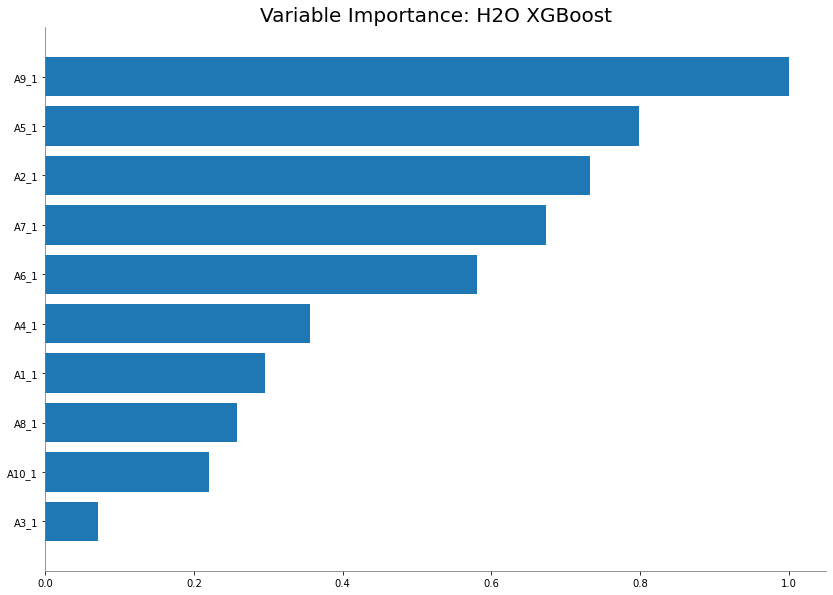

In [ ]:
xgb_model.varimp_plot()

## Deployment

### Installing required libraries

In [ ]:
!pip install wandb
!pip install onnx
!pip install skl2onnx
!pip install onnxruntime
!pip install onnxmltools

     |████████████████████████████████| 1.7 MB 13.8 MB/s 
     |████████████████████████████████| 180 kB 66.3 MB/s 
     |████████████████████████████████| 97 kB 5.4 MB/s 
     |████████████████████████████████| 140 kB 80.6 MB/s 
     |████████████████████████████████| 63 kB 1.4 MB/s 
  Created wheel for subprocess32: filename=subprocess32-3.5.4-py3-none-any.whl size=6502 sha256=6f5b8d2aed3abebb3ab9662152045fda4390040d9c0b1f82abd9bf6d5586224a
  Stored in directory: /root/.cache/pip/wheels/50/ca/fa/8fca8d246e64f19488d07567547ddec8eb084e8c0d7a59226a
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8807 sha256=ca1248f6138a1c97d1ce7f12a1228a4f8a724e66479e948ee74f3135941b552c
  Stored in directory: /root/.cache/pip/wheels/3e/31/09/fa59cef12cdcfecc627b3d24273699f390e71828921b2cbba2
Successfully built subprocess32 pathtools
     |████████████████████████████████| 12.7 MB 12.9 MB/s 
     |████████████████████████████████| 271 kB 13.8 MB/s 
     |███████████████████

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from xgboost import XGBRegressor
from onnx.tools.net_drawer import GetPydotGraph, GetOpNodeProducer
import onnxruntime as rt
from skl2onnx import convert_sklearn, __version__, update_registered_converter
from skl2onnx.common.data_types import FloatTensorType, StringTensorType
from skl2onnx.common.data_types import Int64TensorType
from skl2onnx.common.shape_calculator import calculate_linear_regressor_output_shapes
from onnxmltools.convert.xgboost.operator_converters.XGBoost import convert_xgboost  # noqa
import pprint
import os
import wandb

### Loading the dataset

In [ ]:
df = pd.read_csv('https://drive.google.com/uc?export=download&id=16Pd-BdhzNMzPqPWD6XEu_XFZaGrSqFUz')

In [ ]:
df.head()

Case_No  A1  A2  ...  Family_mem_with_ASD  Who completed the test  Class/ASD Traits 
0        1   0   0  ...                   no           family member                 No
1        2   1   1  ...                   no           family member                Yes
2        3   1   0  ...                   no           family member                Yes
3        4   1   1  ...                   no           family member                Yes
4        5   1   1  ...                  yes           family member                Yes

[5 rows x 19 columns]

### Identifying categorical and numerical variables

In [ ]:
x_columns = ['A1','A2','A3','A4','A5','A6','A7','A8','A9','A10','Age_Mons','Sex','Ethnicity','Jaundice','Family_mem_with_ASD']

In [ ]:
cat_features = ['A1','A2','A3','A4','A5','A6','A7','A8','A9','A10','Sex','Ethnicity','Jaundice','Family_mem_with_ASD']

In [ ]:
num_features = list(set(x_columns) - set(cat_features))

In [ ]:
encoded_df = pd.get_dummies(df[x_columns], columns=cat_features, drop_first = True)

In [ ]:
encoded_df.sample(5)

Age_Mons  A1_1  ...  Jaundice_yes  Family_mem_with_ASD_yes
72         21     1  ...             0                        0
575        35     0  ...             1                        0
86         22     0  ...             1                        1
164        12     0  ...             0                        0
447        12     1  ...             0                        0

[5 rows x 24 columns]

In [ ]:
x_features = list(encoded_df.columns)

In [ ]:
encoded_df.shape

(1054, 24)

### Data Splitting

In [ ]:
X = encoded_df

In [ ]:
Y = pd.get_dummies(df['Class/ASD Traits '], drop_first=True)

In [ ]:
# Splitting after One - Hot Encoding
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

X_train, X_prod, Y_train, Y_prod = train_test_split(X_train, Y_train, test_size=0.25, random_state=2) # 0.25 x 0.8 = 0.2

In [ ]:
# Splitting
train_X, test_X, train_Y, test_Y = train_test_split(df[x_columns], Y, test_size=0.2, random_state=1)

train_X, prod_X, train_Y, prod_Y = train_test_split(train_X, train_Y, test_size=0.25, random_state=2) # 0.25 x 0.8 = 0.2

In [ ]:
Y_train

Yes
462     1
852     1
1010    1
296     0
573     1
...   ...
300     1
787     1
637     0
624     1
66      1

[632 rows x 1 columns]

### Creating the pipeline for deployment

In [ ]:
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[('onehot', 
                                           OneHotEncoder(drop='first', sparse=False))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_features),                  
        ('cat', categorical_transformer, cat_features),
    ])

params = { "n_estimators": 400,
           "max_depth": 4,
           "objective": 'reg:squarederror' }

#xgb_regressor = XGBRegressor(**params)

clf1 = Pipeline(steps=[('preprocessor', preprocessor),
                      ("classifier", LogisticRegression(random_state=100))])           

clf1.fit(train_X, train_Y)



#rmse = np.sqrt(mean_squared_error(test_Y, 
#                                  reg.predict(test_X)))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Age_Mons']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse=False))]),
                                                  ['A1', 'A2', 'A3', 'A4', 'A5',
                                                   'A6', 'A7', 'A8', 'A9',
                                                   'A10', 'Sex', 'Ethnicity',
                                                   'Jaundice',
                                                   'Fam

In [ ]:
pred1_Y = clf1.predict(test_X)

Text(0.5, 257.44, 'Predicted label')

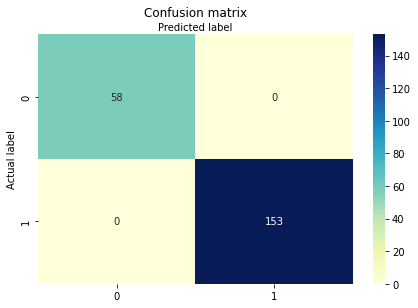

In [ ]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(test_Y, pred1_Y)
cnf_matrix

# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
acc = metrics.accuracy_score(test_Y, pred1_Y)
prec = metrics.precision_score(test_Y, pred1_Y)
rec = metrics.recall_score(test_Y, pred1_Y)
f1 = metrics.f1_score(test_Y, pred1_Y)
spec = cnf_matrix.ravel()[0]/(cnf_matrix.ravel()[0]+cnf_matrix.ravel()[1])

In [ ]:
print(acc)

1.0


### Creating the ONNX Graph

In [ ]:
def convert_dataframe_schema(df, drop=None):
    inputs = []
    for k, v in zip(df.columns, df.dtypes):
        if drop is not None and k in drop:
            continue
        if v == 'int64':
            t = FloatTensorType([None, 1])
        elif v == 'float64':
            t = FloatTensorType([None, 1])
        else:
            t = StringTensorType([None, 1])
        inputs.append((k, t))
    return inputs


inputs = convert_dataframe_schema(train_X)

pprint.pprint(inputs)

[('A1', FloatTensorType(shape=[None, 1])),
 ('A2', FloatTensorType(shape=[None, 1])),
 ('A3', FloatTensorType(shape=[None, 1])),
 ('A4', FloatTensorType(shape=[None, 1])),
 ('A5', FloatTensorType(shape=[None, 1])),
 ('A6', FloatTensorType(shape=[None, 1])),
 ('A7', FloatTensorType(shape=[None, 1])),
 ('A8', FloatTensorType(shape=[None, 1])),
 ('A9', FloatTensorType(shape=[None, 1])),
 ('A10', FloatTensorType(shape=[None, 1])),
 ('Age_Mons', FloatTensorType(shape=[None, 1])),
 ('Sex', StringTensorType(shape=[None, 1])),
 ('Ethnicity', StringTensorType(shape=[None, 1])),
 ('Jaundice', StringTensorType(shape=[None, 1])),
 ('Family_mem_with_ASD', StringTensorType(shape=[None, 1]))]


In [ ]:
#update_registered_converter(
#    LogisticRegression, 'LogisticRegressor',
#    calculate_linear_regressor_output_shapes, convert_xgboost)

### Converting the pipeline to ONNX format

In [ ]:
model_onnx = convert_sklearn(
    clf1, 'pipeline_logreg',
    inputs)

### Storing the pipeline in a file

In [ ]:
MODEL_DIR = "./autismscreeningprod"
MODEL_FILE_NAME = "autismscreening_logreg.onnx"

In [ ]:
os.mkdir(MODEL_DIR)
# And save.
with open(MODEL_DIR + "/" + MODEL_FILE_NAME, "wb") as f:
    f.write(model_onnx.SerializeToString())

In [ ]:
!ls -al

total 20
drwxr-xr-x 1 root root 4096 Nov 25 10:10 .
drwxr-xr-x 1 root root 4096 Nov 25 09:59 ..
drwxr-xr-x 2 root root 4096 Nov 25 10:10 autismscreeningprod
drwxr-xr-x 4 root root 4096 Nov 18 14:35 .config
drwxr-xr-x 1 root root 4096 Nov 18 14:36 sample_data


### Uploading the pipeline to weights and biases for tracking

In [ ]:
os.environ["WANDB_API_KEY"] = "26ff855733a63e9d999357d3e3bd1eb135cff5a5"

In [ ]:
wandb.init(project='Autism_Screening_ONNX', 
           config=params, 
           tags = ['LogReg', 'OneHotEncoding'])

wandb.run.name = "LogRegProdModel"

wandb: Currently logged in as: thisisshax (use `wandb login --relogin` to force relogin)


In [ ]:
#wandb.log( {"acc" : acc} )
wandb.log( {"Accuracy" : acc, 
              "Precision": prec,
              "Recall": rec,
              "F1 score" : f1} )

In [ ]:
model_artifact = wandb.Artifact("LogReg_AutismScreening",
                                type = 'model',
                                description = 'LogReg Model for autism tracking prediction')

In [ ]:
model_artifact.add_dir(MODEL_DIR)

wandb: Adding directory to artifact (./autismscreeningprod)... Done. 0.1s


In [ ]:
wandb.run.log_artifact(model_artifact)

In [ ]:
wandb.save()
wandb.finish()

wandb: WARNING Calling run.save without any arguments is deprecated.Changes to attributes are automatically persisted.


In [ ]:
!zip -r wandb_onnx.zip /content/wandb

  adding: content/wandb/ (stored 0%)
  adding: content/wandb/debug-internal.log (deflated 89%)
  adding: content/wandb/run-20211125_101255-1g7v22w2/ (stored 0%)
  adding: content/wandb/run-20211125_101255-1g7v22w2/logs/ (stored 0%)
  adding: content/wandb/run-20211125_101255-1g7v22w2/logs/debug-internal.log (deflated 89%)
  adding: content/wandb/run-20211125_101255-1g7v22w2/logs/debug.log (deflated 82%)
  adding: content/wandb/run-20211125_101255-1g7v22w2/files/ (stored 0%)
  adding: content/wandb/run-20211125_101255-1g7v22w2/files/config.yaml (deflated 55%)
  adding: content/wandb/run-20211125_101255-1g7v22w2/files/wandb-metadata.json (deflated 36%)
  adding: content/wandb/run-20211125_101255-1g7v22w2/files/output.log (deflated 28%)
  adding: content/wandb/run-20211125_101255-1g7v22w2/files/wandb-summary.json (deflated 31%)
  adding: content/wandb/run-20211125_101255-1g7v22w2/files/requirements.txt (deflated 55%)
  adding: content/wandb/run-20211125_101255-1g7v22w2/tmp/ (stored 0%)
  

## Monitoring

In [ ]:
#Running on production set
pred_final_y = clf1.predict(prod_X)

Text(0.5, 637.6, 'Predicted label')

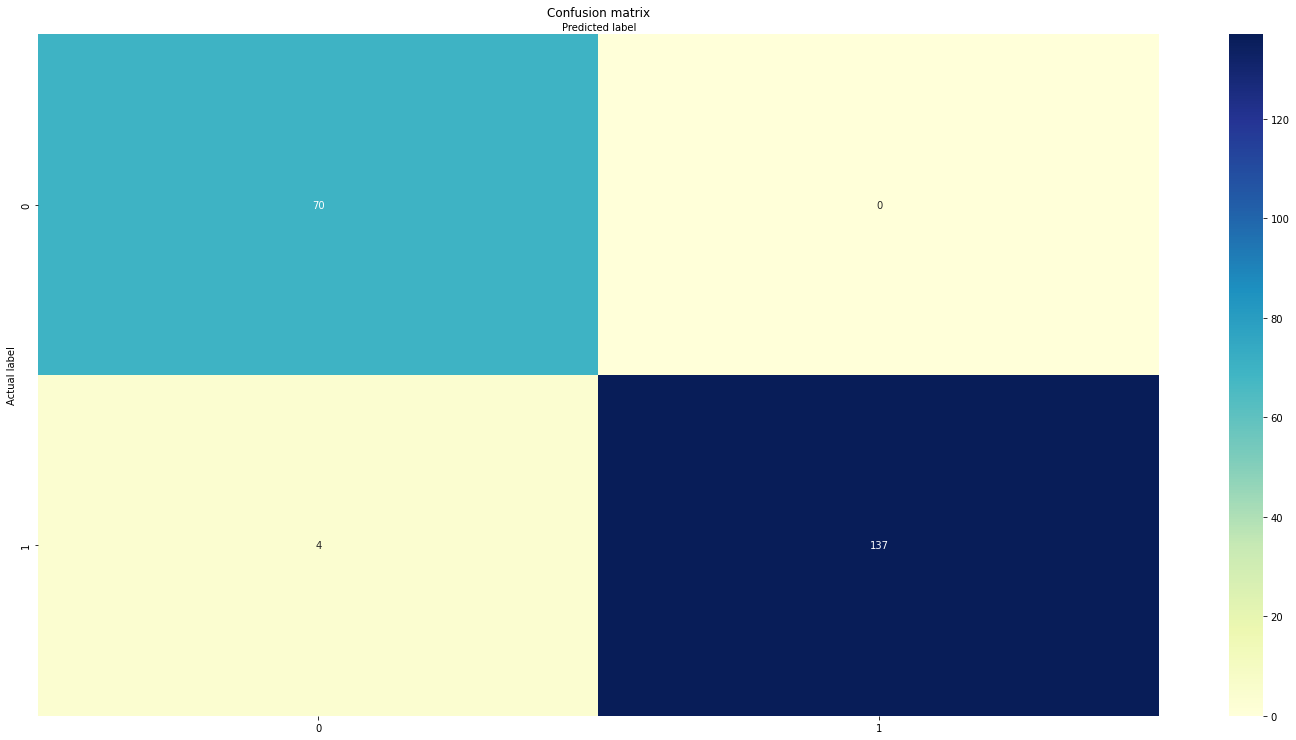

In [ ]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(prod_Y, pred_final_y)
cnf_matrix

# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
print("Accuracy:",metrics.accuracy_score(prod_Y, pred_final_y))
print("Precision:",metrics.precision_score(prod_Y, pred_final_y))
print("Recall:",metrics.recall_score(prod_Y, pred_final_y))
print("f1 score:",metrics.f1_score(prod_Y, pred_final_y))
print("Specificity", cnf_matrix.ravel()[0]/(cnf_matrix.ravel()[0]+cnf_matrix.ravel()[1]))

Accuracy: 0.981042654028436
Precision: 1.0
Recall: 0.9716312056737588
f1 score: 0.9856115107913669
Specificity 1.0


### Model Explanation

In [ ]:
new_cat_features = list(clf1['preprocessor'].transformers_[1][1].get_feature_names())
new_cat_features

['x0_1',
 'x1_1',
 'x2_1',
 'x3_1',
 'x4_1',
 'x5_1',
 'x6_1',
 'x7_1',
 'x8_1',
 'x9_1',
 'x10_m',
 'x11_Latino',
 'x11_Native Indian',
 'x11_Others',
 'x11_Pacifica',
 'x11_White European',
 'x11_asian',
 'x11_black',
 'x11_middle eastern',
 'x11_mixed',
 'x11_south asian',
 'x12_yes',
 'x13_yes']

In [ ]:
len(num_features + new_cat_features)

24

In [ ]:
!pip install eli5

In [ ]:
import eli5.sklearn

In [ ]:
eli5.explain_weights( 
    logreg, 
    feature_names = x_features)

Explanation(estimator='LogisticRegression(max_iter=10000)', description="\nFeatures with largest coefficients.\nCaveats:\n1. Be careful with features which are not\n   independent - weights don't show their importance.\n2. If scale of input features is different then scale of coefficients\n   will also be different, making direct comparison between coefficient values\n   incorrect.\n3. Depending on regularization, rare features sometimes may have high\n   coefficients; this doesn't mean they contribute much to the\n   classification result for most examples.\n", error=None, method='linear model', is_regression=False, targets=[TargetExplanation(target=1, feature_weights=FeatureWeights(pos=[FeatureWeight(feature='A2_1', weight=2.658815883512459, std=None, value=None), FeatureWeight(feature='A9_1', weight=2.5950016815136276, std=None, value=None), FeatureWeight(feature='A4_1', weight=2.3081375789461833, std=None, value=None), FeatureWeight(feature='A7_1', weight=2.260001238108098, std=None, value=None), FeatureWeight(feature='A8_1', weight=2.1785707518806627, std=None, value=None), FeatureWeight(feature='A5_1', weight=2.178118250962357, std=None, value=None), FeatureWeight(feature='A6_1', weight=2.1128828413871235, std=None, value=None), FeatureWeight(feature='A1_1', weight=2.039624894887394, std=None, value=None), FeatureWeight(feature='A10_1', weight=2.0306238306549202, std=None, value=None), FeatureWeight(feature='A3_1', weight=1.2570376600709556, std=None, value=None), FeatureWeight(feature='Jaundice_yes', weight=0.6614007387527685, std=None, value=None), FeatureWeight(feature='Ethnicity_Others', weight=0.5235884437003631, std=None, value=None), FeatureWeight(feature='Ethnicity_asian', weight=0.24731712983202567, std=None, value=None), FeatureWeight(feature='Ethnicity_Pacifica', weight=0.19656088757420756, std=None, value=None)], neg=[FeatureWeight(feature='<BIAS>', weight=-8.156638482619423, std=None, value=None), FeatureWeight(feature='Ethnicity_middle eastern', weight=-0.36547137155218556, std=None, value=None), FeatureWeight(feature='Ethnicity_black', weight=-0.2909842511803257, std=None, value=None), FeatureWeight(feature='Ethnicity_White European', weight=-0.22832581988269432, std=None, value=None), FeatureWeight(feature='Family_mem_with_ASD_yes', weight=-0.21517828589206076, std=None, value=None), FeatureWeight(feature='Ethnicity_mixed', weight=-0.1914438400383017, std=None, value=None)], pos_remaining=3, neg_remaining=2), proba=None, score=None, weighted_spans=None, heatmap=None)], feature_importances=None, decision_tree=None, highlight_spaces=None, transition_features=None, image=None)

In [ ]:
#Explaining for an Autistic person
X_test.iloc[0]

Age_Mons                    36
A1_1                         1
A2_1                         0
A3_1                         1
A4_1                         1
A5_1                         1
A6_1                         1
A7_1                         1
A8_1                         1
A9_1                         1
A10_1                        1
Sex_m                        1
Ethnicity_Latino             1
Ethnicity_Native Indian      0
Ethnicity_Others             0
Ethnicity_Pacifica           0
Ethnicity_White European     0
Ethnicity_asian              0
Ethnicity_black              0
Ethnicity_middle eastern     0
Ethnicity_mixed              0
Ethnicity_south asian        0
Jaundice_yes                 0
Family_mem_with_ASD_yes      0
Name: 339, dtype: int64

In [ ]:
Y_test.iloc[0]

Yes    1
Name: 339, dtype: uint8

In [ ]:
eli5.explain_prediction( logreg,
                         X_test.iloc[0],
                         target_names = ['No Autism', 'Autism'] )

Explanation(estimator='LogisticRegression(max_iter=10000)', description=None, error=None, method='linear model', is_regression=False, targets=[TargetExplanation(target='Autism', feature_weights=FeatureWeights(pos=[FeatureWeight(feature='A9_1', weight=2.5950016815136276, std=None, value=1.0), FeatureWeight(feature='A4_1', weight=2.3081375789461833, std=None, value=1.0), FeatureWeight(feature='A7_1', weight=2.260001238108098, std=None, value=1.0), FeatureWeight(feature='A8_1', weight=2.1785707518806627, std=None, value=1.0), FeatureWeight(feature='A5_1', weight=2.178118250962357, std=None, value=1.0), FeatureWeight(feature='A6_1', weight=2.1128828413871235, std=None, value=1.0), FeatureWeight(feature='A1_1', weight=2.039624894887394, std=None, value=1.0), FeatureWeight(feature='A10_1', weight=2.0306238306549202, std=None, value=1.0), FeatureWeight(feature='A3_1', weight=1.2570376600709556, std=None, value=1.0), FeatureWeight(feature='Age_Mons', weight=0.587334404899394, std=None, value=36.0), FeatureWeight(feature='Ethnicity_Latino', weight=0.08726720906837616, std=None, value=1.0)], neg=[FeatureWeight(feature='<BIAS>', weight=-8.156638482619423, std=None, value=1.0), FeatureWeight(feature='Sex_m', weight=-0.049936354284346514, std=None, value=1.0)], pos_remaining=0, neg_remaining=0), proba=0.9999891140369421, score=11.428025505475324, weighted_spans=None, heatmap=None)], feature_importances=None, decision_tree=None, highlight_spaces=None, transition_features=None, image=None)

In [ ]:
#Explaining for an Non-Autistic person
Y_test.head()

Yes
339    1
248    1
664    0
310    1
85     1

In [ ]:
eli5.explain_prediction( logreg,
                         X_test.iloc[2],
                         target_names = ['No Autism', 'Autism'] )

Explanation(estimator='LogisticRegression(max_iter=10000)', description=None, error=None, method='linear model', is_regression=False, targets=[TargetExplanation(target='No Autism', feature_weights=FeatureWeights(pos=[FeatureWeight(feature='<BIAS>', weight=8.156638482619423, std=None, value=1.0), FeatureWeight(feature='Sex_m', weight=0.049936354284346514, std=None, value=1.0)], neg=[FeatureWeight(feature='A6_1', weight=-2.1128828413871235, std=None, value=1.0), FeatureWeight(feature='A10_1', weight=-2.0306238306549202, std=None, value=1.0), FeatureWeight(feature='Age_Mons', weight=-0.4894453374161617, std=None, value=30.0), FeatureWeight(feature='Ethnicity_asian', weight=-0.24731712983202567, std=None, value=1.0)], pos_remaining=0, neg_remaining=0), proba=0.9653203078873285, score=-3.326305697613538, weighted_spans=None, heatmap=None)], feature_importances=None, decision_tree=None, highlight_spaces=None, transition_features=None, image=None)

### Partial Dependency Plots

In [ ]:
from sklearn.inspection import PartialDependenceDisplay

AttributeError: ignored

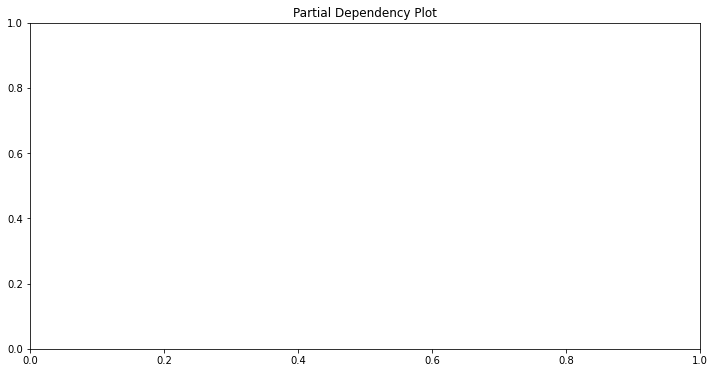

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_title("Partial Dependency Plot")
PartialDependenceDisplay.from_estimator(logreg,
                                        X_test,
                                        features = ['Family_mem_with_ASD_yes'],
                                        feature_names = x_features,
                                        ax = ax);

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_title("Partial Dependency Plot")
PartialDependenceDisplay.from_estimator(logreg,
                                        X_test,
                                        features = ['Age_Mons'],
                                        feature_names = x_features,
                                        ax = ax);

### LIME

In [ ]:
!pip install lime

     |████████████████████████████████| 275 kB 5.4 MB/s 
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283856 sha256=4de21c7a18d0752cd441014a486a058712aa536c884235d3b9921383bbfd839b
  Stored in directory: /root/.cache/pip/wheels/ca/cb/e5/ac701e12d365a08917bf4c6171c0961bc880a8181359c66aa7
Successfully built lime


In [ ]:
import lime
import lime.lime_tabular

In [ ]:
explainer = (lime
             .lime_tabular
             .LimeTabularExplainer(training_data = X_train.to_numpy(), 
                                   training_labels = Y_train,                                   
                                   feature_names = x_features, 
                                   class_names = ['No Autism', 'Autism'],
                                   categorical_features = ['Family_mem_with_ASD_yes'],
                                   categorical_names = ['Family_mem_with_ASD_yes'], 
                                   kernel_width=3,
                                   verbose = True ))

In [ ]:
exp = explainer.explain_instance( X_test.iloc[0].to_numpy(), 
                                  logreg.predict_proba )

Intercept 0.2606932188640342
Prediction_local [1.31894931]
Right: 0.9999891140369421


In [ ]:
exp.show_in_notebook(show_table=True, show_all=False)

In [ ]:
exp = explainer.explain_instance( X_test.iloc[2].to_numpy(), 
                                  logreg.predict_proba )

Intercept 1.2112878767032187
Prediction_local [0.35153209]
Right: 0.03467969211267155


In [ ]:
exp.show_in_notebook(show_table=True, show_all=False)

### Shapley Values

In [ ]:
!pip install shap

     |████████████████████████████████| 371 kB 5.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for shap: filename=shap-0.40.0-cp37-cp37m-linux_x86_64.whl size=509243 sha256=dbe6975c17f9b08df2fc0daf5db4f960e5f026eb42af3ec5b575ce00cd46f461
  Stored in directory: /root/.cache/pip/wheels/ec/35/84/e304841ac4b910bc95fe9a6e5302eb2507b4333728851dcbfb
Successfully built shap


In [ ]:
import shap

In [ ]:
row_to_show = 0
data_for_prediction = X_test.iloc[row_to_show]
data_for_prediction_array = data_for_prediction.values.reshape(1, -1)
dt.predict_proba(data_for_prediction_array)

array([[0., 1.]])

In [ ]:
explainer = shap.TreeExplainer(dt)

shap_values = explainer.shap_values(data_for_prediction_array)

In [ ]:
shap.initjs()
shap.force_plot( explainer.expected_value[1], 
                 shap_values[1], 
                 data_for_prediction,
                 figsize=(20, 2) )

In [ ]:
row_to_show = 2
data_for_prediction = X_test.iloc[row_to_show]
data_for_prediction_array = data_for_prediction.values.reshape(1, -1)
dt.predict_proba(data_for_prediction_array)

shap_values = explainer.shap_values(data_for_prediction_array)

shap.initjs()
shap.force_plot( explainer.expected_value[1], 
                 shap_values[1], 
                 data_for_prediction,
                 figsize=(20, 2) )

### Global Explanation of SHAP

In [ ]:
explainer = shap.TreeExplainer( dt )
shap_values = explainer.shap_values( X_train )

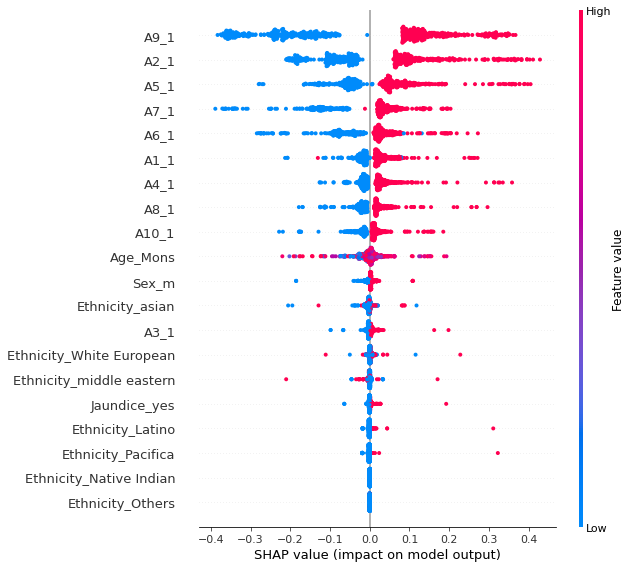

In [ ]:
shap.summary_plot( shap_values[1], X_train, plot_type = 'dot' )

In [ ]:
explainer.expected_value

array([0.31329114, 0.68670886])

In [ ]:
shap.initjs()
shap.force_plot( explainer.expected_value[1], 
                 shap_values[1], 
                 X_train )

### Individual Conditional Expectations (ICE)

AttributeError: ignored

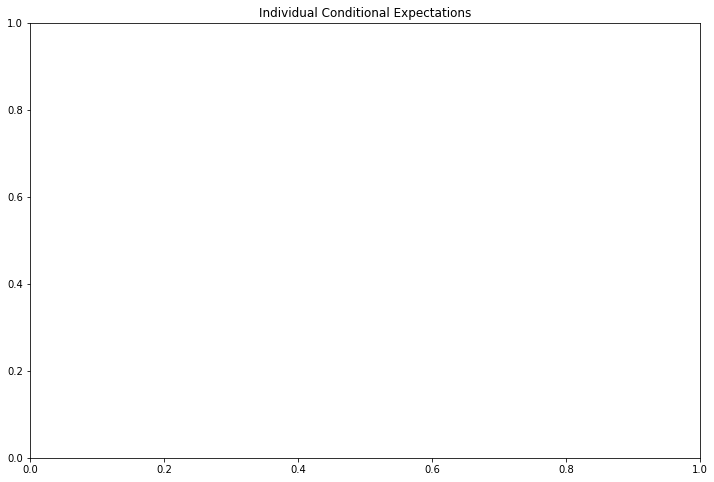

In [ ]:
import matplotlib.pyplot as plt
from sklearn.inspection import PartialDependenceDisplay

fig, ax = plt.subplots(figsize=(12, 8))
ax.set_title("Individual Conditional Expectations")

display = PartialDependenceDisplay.from_estimator(
    logreg,
    X_train,
    features=["Age_Mons"],
    kind="individual",
    subsample=100,
    n_jobs=3,
    grid_resolution=20,
    random_state=0,
    ice_lines_kw={"color": "tab:blue", "alpha": 0.5, "linewidth": 0.5},
    ax = ax
)

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.set_title("Individual Conditional Expectations")

display = PartialDependenceDisplay.from_estimator(
    logreg,
    X_train,
    features=["Age_Mons"],
    kind="both",
    subsample=100,
    n_jobs=3,
    grid_resolution=20,
    random_state=0,
    ice_lines_kw={"color": "tab:blue", "alpha": 0.5, "linewidth": 0.5},
    pd_line_kw={"color": "tab:orange", "linestyle": "--"},
    ax = ax
)

###Model Drift


In [ ]:
new_cat_features = list(clf1['preprocessor'].transformers_[1][1].get_feature_names())
new_cat_features

['x0_1',
 'x1_1',
 'x2_1',
 'x3_1',
 'x4_1',
 'x5_1',
 'x6_1',
 'x7_1',
 'x8_1',
 'x9_1',
 'x10_m',
 'x11_Latino',
 'x11_Native Indian',
 'x11_Others',
 'x11_Pacifica',
 'x11_White European',
 'x11_asian',
 'x11_black',
 'x11_middle eastern',
 'x11_mixed',
 'x11_south asian',
 'x12_yes',
 'x13_yes']

In [ ]:
len(num_features + new_cat_features)

24

In [ ]:
prod_X

A1  A2  A3  A4  ...  Sex       Ethnicity  Jaundice  Family_mem_with_ASD
431   0   1   0   0  ...    f           asian       yes                   no
778   0   0   1   0  ...    f           asian        no                   no
806   1   1   0   0  ...    m  White European        no                  yes
263   1   0   1   1  ...    m  middle eastern        no                   no
663   1   0   0   0  ...    m           asian       yes                   no
..   ..  ..  ..  ..  ...  ...             ...       ...                  ...
353   1   0   1   1  ...    m           asian        no                   no
706   1   0   0   1  ...    m  White European       yes                  yes
522   1   1   1   1  ...    m           black       yes                   no
16    0   0   0   0  ...    m  middle eastern        no                  yes
140   1   1   1   1  ...    m     south asian        no                   no

[211 rows x 15 columns]

Preparing Production Data

In [ ]:
prod_X = prod_X.reset_index()
prod_X

index  A1  A2  A3  ...  Sex       Ethnicity  Jaundice  Family_mem_with_ASD
0      431   0   1   0  ...    f           asian       yes                   no
1      778   0   0   1  ...    f           asian        no                   no
2      806   1   1   0  ...    m  White European        no                  yes
3      263   1   0   1  ...    m  middle eastern        no                   no
4      663   1   0   0  ...    m           asian       yes                   no
..     ...  ..  ..  ..  ...  ...             ...       ...                  ...
206    353   1   0   1  ...    m           asian        no                   no
207    706   1   0   0  ...    m  White European       yes                  yes
208    522   1   1   1  ...    m           black       yes                   no
209     16   0   0   0  ...    m  middle eastern        no                  yes
210    140   1   1   1  ...    m     south asian        no                   no

[211 rows x 16 columns]

In [ ]:
prod_X_cols = clf1.named_steps['preprocessor'].transform(prod_X[x_columns])
prod_X_cols

array([[ 0.88057225,  0.        ,  1.        , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.75266564,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.00847886,  1.        ,  1.        , ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-0.52640047,  1.        ,  1.        , ...,  0.        ,
         1.        ,  0.        ],
       [ 1.00847886,  0.        ,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       [-0.65430708,  1.        ,  1.        , ...,  1.        ,
         0.        ,  0.        ]])

In [ ]:
prod_X_cols_df = pd.DataFrame(prod_X_cols, columns  = num_features + new_cat_features)
prod_X_cols_df

Age_Mons  x0_1  x1_1  x2_1  ...  x11_mixed  x11_south asian  x12_yes  x13_yes
0    0.880572   0.0   1.0   0.0  ...        0.0              0.0      1.0      0.0
1    0.752666   0.0   0.0   1.0  ...        0.0              0.0      0.0      0.0
2    1.008479   1.0   1.0   0.0  ...        0.0              0.0      0.0      1.0
3    0.241039   1.0   0.0   1.0  ...        0.0              0.0      0.0      0.0
4   -1.805467   1.0   0.0   0.0  ...        0.0              0.0      1.0      0.0
..        ...   ...   ...   ...  ...        ...              ...      ...      ...
206  0.752666   1.0   0.0   1.0  ...        0.0              0.0      0.0      0.0
207 -0.526400   1.0   0.0   0.0  ...        0.0              0.0      1.0      1.0
208 -0.526400   1.0   1.0   1.0  ...        0.0              0.0      1.0      0.0
209  1.008479   0.0   0.0   0.0  ...        0.0              0.0      0.0      1.0
210 -0.654307   1.0   1.0   1.0  ...        0.0              1.0      0.0      0.0

[211 rows x 24 columns]

In [ ]:
prod_X_cols_df_final = pd.concat([prod_X[num_features], prod_X_cols_df[new_cat_features]], axis = 1)
prod_X_cols_df_final

Age_Mons  x0_1  x1_1  x2_1  ...  x11_mixed  x11_south asian  x12_yes  x13_yes
0          35   0.0   1.0   0.0  ...        0.0              0.0      1.0      0.0
1          34   0.0   0.0   1.0  ...        0.0              0.0      0.0      0.0
2          36   1.0   1.0   0.0  ...        0.0              0.0      0.0      1.0
3          30   1.0   0.0   1.0  ...        0.0              0.0      0.0      0.0
4          14   1.0   0.0   0.0  ...        0.0              0.0      1.0      0.0
..        ...   ...   ...   ...  ...        ...              ...      ...      ...
206        34   1.0   0.0   1.0  ...        0.0              0.0      0.0      0.0
207        24   1.0   0.0   0.0  ...        0.0              0.0      1.0      1.0
208        24   1.0   1.0   1.0  ...        0.0              0.0      1.0      0.0
209        36   0.0   0.0   0.0  ...        0.0              0.0      0.0      1.0
210        23   1.0   1.0   1.0  ...        0.0              1.0      0.0      0.0

[211 rows x 24 columns]

In [ ]:
prod_X_cols_df_final['prediction'] = clf1.predict(prod_X[x_columns])
prod_X_cols_df_final

Age_Mons  x0_1  x1_1  x2_1  ...  x11_south asian  x12_yes  x13_yes  prediction
0          35   0.0   1.0   0.0  ...              0.0      1.0      0.0           0
1          34   0.0   0.0   1.0  ...              0.0      0.0      0.0           1
2          36   1.0   1.0   0.0  ...              0.0      0.0      1.0           1
3          30   1.0   0.0   1.0  ...              0.0      0.0      0.0           0
4          14   1.0   0.0   0.0  ...              0.0      1.0      0.0           1
..        ...   ...   ...   ...  ...              ...      ...      ...         ...
206        34   1.0   0.0   1.0  ...              0.0      0.0      0.0           1
207        24   1.0   0.0   0.0  ...              0.0      1.0      1.0           1
208        24   1.0   1.0   1.0  ...              0.0      1.0      0.0           1
209        36   0.0   0.0   0.0  ...              0.0      0.0      1.0           0
210        23   1.0   1.0   1.0  ...              1.0      0.0      0.0           1

[211 rows x 25 columns]

In [ ]:
train_X

A1  A2  A3  A4  ...  Sex       Ethnicity  Jaundice  Family_mem_with_ASD
462    1   1   1   1  ...    m           asian        no                   no
852    1   1   0   1  ...    m           black       yes                  yes
1010   0   1   1   1  ...    m          Latino        no                   no
296    1   0   0   0  ...    m  White European        no                   no
573    0   0   1   1  ...    f  White European       yes                   no
...   ..  ..  ..  ..  ...  ...             ...       ...                  ...
300    1   1   0   1  ...    f  White European        no                   no
787    0   0   0   1  ...    m           asian        no                   no
637    0   0   0   0  ...    f           asian        no                   no
624    1   1   0   0  ...    m  White European        no                   no
66     0   0   0   0  ...    f  middle eastern       yes                   no

[632 rows x 15 columns]

In [ ]:
train_x_new = train_X.reset_index()
train_x_cols = clf1.named_steps['preprocessor'].transform(train_x_new)
train_x_cols_df = pd.DataFrame(train_x_cols, columns  = num_features + new_cat_features)
train_x_cols_df_final = pd.concat([train_x_new[num_features], train_x_cols_df[new_cat_features]], axis = 1)
train_x_cols_df_final['prediction'] = clf1.predict(train_X[x_columns])
train_x_cols_df_final['Class/ASD Traits'] = np.array(Y_train)
train_x_cols_df_final

Age_Mons  x0_1  x1_1  x2_1  ...  x12_yes  x13_yes  prediction  Class/ASD Traits
0          19   1.0   1.0   1.0  ...      0.0      0.0           1                 1
1          18   1.0   1.0   0.0  ...      1.0      1.0           1                 1
2          30   0.0   1.0   1.0  ...      0.0      0.0           1                 1
3          33   1.0   0.0   0.0  ...      0.0      0.0           0                 0
4          32   0.0   0.0   1.0  ...      1.0      0.0           1                 1
..        ...   ...   ...   ...  ...      ...      ...         ...               ...
627        18   1.0   1.0   0.0  ...      0.0      0.0           1                 1
628        36   0.0   0.0   0.0  ...      0.0      0.0           1                 1
629        36   0.0   0.0   0.0  ...      0.0      0.0           0                 0
630        27   1.0   1.0   0.0  ...      0.0      0.0           1                 1
631        36   0.0   0.0   0.0  ...      1.0      0.0           1                 1

[632 rows x 26 columns]

In [ ]:
!pip install evidently

  Using cached PyYAML-6.0-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_12_x86_64.manylinux2010_x86_64.whl (596 kB)
  Using cached statsmodels-0.12.2-cp37-cp37m-manylinux1_x86_64.whl (9.5 MB)
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.13.1
    Uninstalling statsmodels-0.13.1:
      Successfully uninstalled statsmodels-0.13.1
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 5.4.1
    Uninstalling PyYAML-5.4.1:
      Successfully uninstalled PyYAML-5.4.1


In [ ]:
!pip install statsmodels --upgrade
!pip install pyyaml==5.4.1
from evidently.dashboard import Dashboard
from evidently.tabs import DataDriftTab, NumTargetDriftTab

from evidently.model_profile import Profile
from evidently.profile_sections import DataDriftProfileSection

  Using cached statsmodels-0.13.1-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (9.8 MB)
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
evidently 0.1.31.dev0 requires statsmodels~=0.12.2, but you have statsmodels 0.13.1 which is incompatible.


  Using cached PyYAML-5.4.1-cp37-cp37m-manylinux1_x86_64.whl (636 kB)
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 6.0
    Uninstalling PyYAML-6.0:
      Successfully uninstalled PyYAML-6.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
evidently 0.1.31.dev0 requires PyYAML~=6.0, but you have pyyaml 5.4.1 which is incompatible.
evidently 0.1.31.dev0 requires statsmodels~=0.12.2, but you have statsmodels 0.13.1 which is incompatible.


/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [ ]:
column_mapping = {}

column_mapping['target'] = 'Class/ASD Traits'
column_mapping['prediction'] = 'prediction'
column_mapping['datetime'] = None

column_mapping['numerical_features'] = num_features
column_mapping['categorical_features'] = new_cat_features

In [ ]:
column_mapping

{'categorical_features': ['x0_1',
  'x1_1',
  'x2_1',
  'x3_1',
  'x4_1',
  'x5_1',
  'x6_1',
  'x7_1',
  'x8_1',
  'x9_1',
  'x10_m',
  'x11_Latino',
  'x11_Native Indian',
  'x11_Others',
  'x11_Pacifica',
  'x11_White European',
  'x11_asian',
  'x11_black',
  'x11_middle eastern',
  'x11_mixed',
  'x11_south asian',
  'x12_yes',
  'x13_yes'],
 'datetime': None,
 'numerical_features': ['Age_Mons'],
 'prediction': 'prediction',
 'target': 'Class/ASD Traits'}

In [ ]:
data_drift_dashboard = Dashboard(tabs=[DataDriftTab])
data_drift_dashboard.calculate(train_x_cols_df_final, 
                               prod_X_cols_df_final, 
                               column_mapping = column_mapping)

In [ ]:
data_drift_dashboard.save("newreports/datadriftV1.html")

In [ ]:
data_drift_profile = Profile(sections=[DataDriftProfileSection])
data_drift_profile.calculate(train_x_cols_df_final, 
                             prod_X_cols_df_final, 
                             column_mapping = column_mapping)
data_drift_profile.json()

'{"data_drift": {"name": "data_drift", "datetime": "2021-11-22 20:45:06.808706", "data": {"utility_columns": {"date": null, "id": null, "target": "Class/ASD Traits", "prediction": "prediction", "drift_conf_level": 0.95, "drift_features_share": 0.5, "nbinsx": null, "xbins": null}, "cat_feature_names": ["x0_1", "x1_1", "x2_1", "x3_1", "x4_1", "x5_1", "x6_1", "x7_1", "x8_1", "x9_1", "x10_m", "x11_Latino", "x11_Native Indian", "x11_Others", "x11_Pacifica", "x11_White European", "x11_asian", "x11_black", "x11_middle eastern", "x11_mixed", "x11_south asian", "x12_yes", "x13_yes"], "num_feature_names": ["Age_Mons"], "target_names": null, "metrics": {"Age_Mons": {"current_small_hist": [[0.057266982622432856, 0.01974723538704581, 0.02369668246445499, 0.021721958925750375, 0.009873617693522912, 0.0572669826224329, 0.035545023696682436, 0.035545023696682485, 0.015797788309636684, 0.14020537124802496], [12.0, 14.4, 16.8, 19.2, 21.6, 24.0, 26.4, 28.8, 31.2, 33.599999999999994, 36.0]], "ref_small_hi

In [ ]:
prod_X_cols_df_final['Class/ASD Traits'] = Y_prod

In [ ]:
from evidently.tabs import RegressionPerformanceTab

In [ ]:
dashboard = Dashboard(tabs=[RegressionPerformanceTab])

In [ ]:
dashboard.calculate(train_x_cols_df_final, 
                    prod_X_cols_df_final, 
                    column_mapping=column_mapping)

In [ ]:
dashboard.save("newreports/dataPerormanceV1.html")

### Model Scorecard

In [ ]:
!pip install --upgrade pip==20.2
!pip install -U seaborn scikit-learn model-card-toolkit

Requirement already up-to-date: pip==20.2 in /usr/local/lib/python3.7/dist-packages (20.2)
Requirement already up-to-date: seaborn in /usr/local/lib/python3.7/dist-packages (0.11.2)
Requirement already up-to-date: scikit-learn in /usr/local/lib/python3.7/dist-packages (1.0.1)
Requirement already up-to-date: model-card-toolkit in /usr/local/lib/python3.7/dist-packages (1.1.0)
  Attempting uninstall: google-cloud-core
    Found existing installation: google-cloud-core 1.0.3
    Uninstalling google-cloud-core-1.0.3:
      Successfully uninstalled google-cloud-core-1.0.3
ERROR: After October 2020 you may experience errors when installing or updating packages. This is because pip will change the way that it resolves dependency conflicts.

We recommend you use --use-feature=2020-resolver to test your packages with the new resolver before it becomes the default.

google-cloud-storage 1.18.1 requires google-resumable-media<0.5.0dev,>=0.3.1, but you'll have google-resumable-media 1.3.3 which is

In [ ]:
from datetime import date
from io import BytesIO
from IPython import display
import model_card_toolkit as mctlib
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_roc_curve, plot_confusion_matrix

import base64
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import uuid

### Create Plot


In [ ]:
# Utility function that will export a plot to a base-64 encoded string that the model card will accept.

def plot_to_str():
    img = BytesIO()
    plt.savefig(img, format='png')
    return base64.encodebytes(img.getvalue()).decode('utf-8')

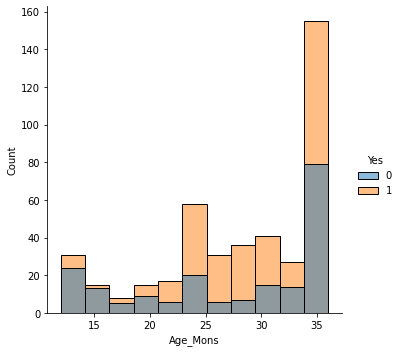

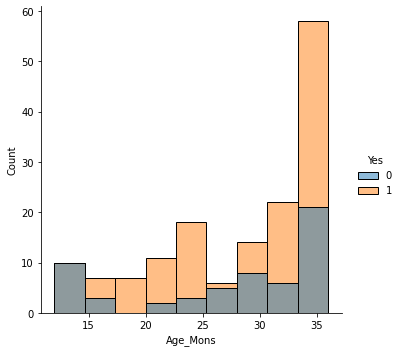

In [ ]:
# Plot the age in months for both the train and test sets

Y_train_s = Y_train.squeeze()
Y_test_s = Y_test.squeeze()

sns.displot(x=X_train['Age_Mons'], hue=Y_train_s)
Age_mon_train = plot_to_str()

sns.displot(x=X_test['Age_Mons'], hue=Y_test_s)
Age_mon_test = plot_to_str()

## Create Model Card for Decision Tree

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

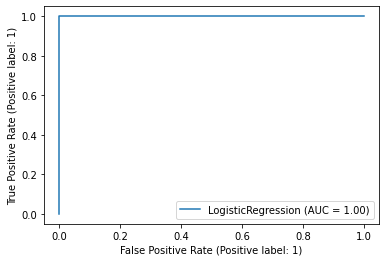

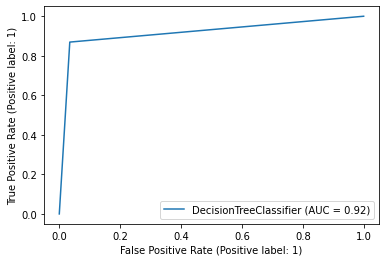

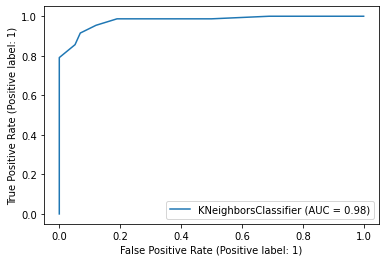

In [ ]:
# Plot a ROC curve


plot_roc_curve(lrfit, X_test, Y_test)
roc_curve_lr = plot_to_str()

plot_roc_curve(dtfit, X_test, Y_test)
roc_curve_dt = plot_to_str()

plot_roc_curve(knnfit, X_test, Y_test)
roc_curve_knn = plot_to_str()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMa

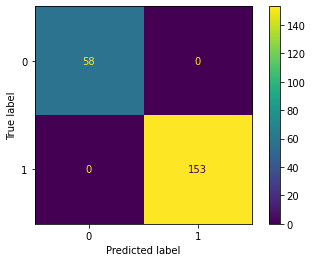

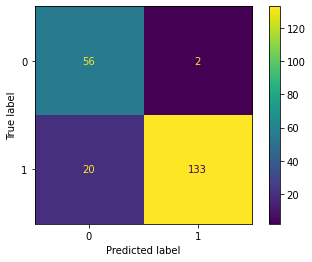

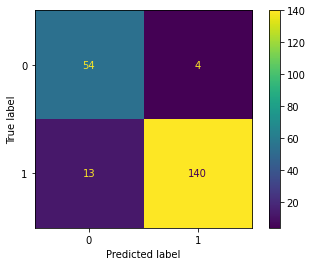

In [ ]:
# Plot a confusion matrix

plot_confusion_matrix(lrfit, X_test, Y_test)
confusion_matrix_lr = plot_to_str()

plot_confusion_matrix(dtfit, X_test, Y_test)
confusion_matrix_dt = plot_to_str()

plot_confusion_matrix(knnfit, X_test, Y_test)
confusion_matrix_knn = plot_to_str()

### Initialize toolkit and model card

In [ ]:
mct = mctlib.ModelCardToolkit()

model_card = mct.scaffold_assets()

### Annotate model details into model card

In [ ]:
model_card.model_details.name = 'Autism Screening Dataset'
model_card.model_details.overview = (
    'This model predicts whether a child is autistic or not based certain factors')
model_card.model_details.owners = [
    mctlib.Owner(name= 'Model Cards Team', contact='model-cards@google.com')
]
model_card.model_details.version.name = str("Version 1.0")
model_card.model_details.version.date = str(date.today())

### Add model uses and user details, ethical considerations and limitations

In [ ]:
model_card.considerations.ethical_considerations = [mctlib.Risk(
    name=('Manual selection of image sections to digitize could create '
            'selection bias'),
    mitigation_strategy='Automate the selection process'
)]
model_card.considerations.limitations = [mctlib.Limitation(description='Autism diagnosis')]
model_card.considerations.use_cases = [mctlib.UseCase(description='Autism diagnosis')]
model_card.considerations.users = [mctlib.User(description='Medical professionals'), mctlib.User(description='ML researchers')]

### Add training and test dataset details

In [ ]:
model_card.model_parameters.data.append(mctlib.Dataset(name="Training Dataset"))
model_card.model_parameters.data[0].graphics.description = (
  f'{len(X_train)} rows with {len(X_train.columns)} features')
model_card.model_parameters.data[0].graphics.collection =[
    mctlib.Graphic(image=Age_mon_train)
]
model_card.model_parameters.data.append(mctlib.Dataset(name="Test Dataset"))
model_card.model_parameters.data[1].graphics.description = (
  f'{len(X_test)} rows with {len(X_test.columns)} features')
model_card.model_parameters.data[1].graphics.collection =[
    mctlib.Graphic(image=Age_mon_test)
]

### Add Model Evaluation Details


In [ ]:
model_card.quantitative_analysis.graphics.description = (
  'ROC curve and confusion matrix for decision tree')
model_card.quantitative_analysis.graphics.collection = [
    mctlib.Graphic(image=roc_curve_dt),
    mctlib.Graphic(image=confusion_matrix_dt),
]

In [ ]:
model_card.quantitative_analysis.graphics.description = (
  'ROC curve and confusion matrix for knn')
model_card.quantitative_analysis.graphics.collection = [
    mctlib.Graphic(image=roc_curve_knn),
    mctlib.Graphic(image=confusion_matrix_knn),
]

In [ ]:
mct.update_model_card(model_card)

### Generate Model Card for Decision Tree

In [ ]:
# Return the model card document as an HTML page

html = mct.export_format(output_file='/mnt/demo_cardv3.html')

In [ ]:
display.display(display.HTML(html))

### Model Card for KNN

In [ ]:
mct = mctlib.ModelCardToolkit()

model_card = mct.scaffold_assets()

### Annotate model details into model card

In [ ]:
model_card.model_details.name = 'Autism Screening Dataset'
model_card.model_details.overview = (
    'This model predicts whether a child is autistic or not based certain factors')
model_card.model_details.owners = [
    mctlib.Owner(name= 'Model Cards Team', contact='model-cards@google.com')
]
model_card.model_details.version.name = str("Version 1.0")
model_card.model_details.version.date = str(date.today())

### Add model uses and user details, ethical considerations and limitations

In [ ]:
model_card.considerations.ethical_considerations = [mctlib.Risk(
    name=('Manual selection of image sections to digitize could create '
            'selection bias'),
    mitigation_strategy='Automate the selection process'
)]
model_card.considerations.limitations = [mctlib.Limitation(description='Autism diagnosis')]
model_card.considerations.use_cases = [mctlib.UseCase(description='Autism diagnosis')]
model_card.considerations.users = [mctlib.User(description='Medical professionals'), mctlib.User(description='ML researchers')]

### Add training and test dataset details

In [ ]:
model_card.model_parameters.data.append(mctlib.Dataset(name="Training Dataset"))
model_card.model_parameters.data[0].graphics.description = (
  f'{len(X_train)} rows with {len(X_train.columns)} features')
model_card.model_parameters.data[0].graphics.collection =[
    mctlib.Graphic(image=Age_mon_train)
]
model_card.model_parameters.data.append(mctlib.Dataset(name="Test Dataset"))
model_card.model_parameters.data[1].graphics.description = (
  f'{len(X_test)} rows with {len(X_test.columns)} features')
model_card.model_parameters.data[1].graphics.collection =[
    mctlib.Graphic(image=Age_mon_test)
]

### Add Model Evaluation Details


In [ ]:
model_card.quantitative_analysis.graphics.description = (
  'ROC curve and confusion matrix for knn')
model_card.quantitative_analysis.graphics.collection = [
    mctlib.Graphic(image=roc_curve_knn),
    mctlib.Graphic(image=confusion_matrix_knn),
]

In [ ]:
mct.update_model_card(model_card)

### Generate Model Card for KNN




In [ ]:
# Return the model card document as an HTML page

html = mct.export_format(output_file='/mnt/demo_cardv4.html')

In [ ]:
display.display(display.HTML(html))

### Model Card for Logistic regression

In [ ]:
mct = mctlib.ModelCardToolkit()

model_card = mct.scaffold_assets()

### Annotate model details into model card

In [ ]:
model_card.model_details.name = 'Autism Screening Dataset'
model_card.model_details.overview = (
    'This model predicts whether a child is autistic or not based certain factors')
model_card.model_details.owners = [
    mctlib.Owner(name= 'Model Cards Team', contact='model-cards@google.com')
]
model_card.model_details.version.name = str("Version 1.0")
model_card.model_details.version.date = str(date.today())

### Add model uses and user details, ethical considerations and limitations

In [ ]:
model_card.considerations.ethical_considerations = [mctlib.Risk(
    name=('Manual selection of image sections to digitize could create '
            'selection bias'),
    mitigation_strategy='Automate the selection process'
)]
model_card.considerations.limitations = [mctlib.Limitation(description='Autism diagnosis')]
model_card.considerations.use_cases = [mctlib.UseCase(description='Autism diagnosis')]
model_card.considerations.users = [mctlib.User(description='Medical professionals'), mctlib.User(description='ML researchers')]

### Add training and test dataset details

In [ ]:
model_card.model_parameters.data.append(mctlib.Dataset(name="Training Dataset"))
model_card.model_parameters.data[0].graphics.description = (
  f'{len(X_train)} rows with {len(X_train.columns)} features')
model_card.model_parameters.data[0].graphics.collection =[
    mctlib.Graphic(image=Age_mon_train)
]
model_card.model_parameters.data.append(mctlib.Dataset(name="Test Dataset"))
model_card.model_parameters.data[1].graphics.description = (
  f'{len(X_test)} rows with {len(X_test.columns)} features')
model_card.model_parameters.data[1].graphics.collection =[
    mctlib.Graphic(image=Age_mon_test)
]

### Add Model Evaluation Details


In [ ]:
model_card.quantitative_analysis.graphics.description = (
  'ROC curve and confusion matrix for Logistic Regression')
model_card.quantitative_analysis.graphics.collection = [
    mctlib.Graphic(image=roc_curve_lr),
    mctlib.Graphic(image=confusion_matrix_lr),
]

In [ ]:
mct.update_model_card(model_card)

### Generate Model Card for KNN




In [ ]:
# Return the model card document as an HTML page

html = mct.export_format(output_file='/mnt/demo_cardv5.html')

In [ ]:
display.display(display.HTML(html))